<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/ReCell_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Foundations/Project/used_device_data.csv')

## Data Overview

In [ ]:
# Displaying first 5 rows of dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Checking the shape of dataset
data.shape

(3454, 15)

- The dataset contains information (15 attributes) about the 3454 devices

In [ ]:
# Checking data types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- There are 11 numeric (float and int type) and 4 string (object type) columns in the dataset

- The target variable is the normalized_used_price of device, which is of float type

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

- There are no duplicates in the dataset

In [ ]:
# Checking missing values of dataset
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- There are missing values in 6 attributes
- Main camera mega-pixels is the one missing the most values

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- Android is the most common opperating system used with these devices
- Most devices have 4G capability and not 5G
- All devices have a main camera with MP of .08 to 48
- Internal Memory (ROM) varies from .01 to 1024 GB
- Amount of RAM varies from .02 to 12 GB
- Release years of devices are from 2013 to 2020
- Battery capacity varies from 500 to 9720 mAh
- Weight of the device varies from ~88 to 855 grams
- Devices were used from ~3months to ~3years  

## Exploratory Data Analysis (EDA)

**Questions that will be answered through EDA**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis

In [ ]:
# Creating function to plot boxplots and histograms on the same x-scale

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots

# To create a boxplot with a triangle indicating the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

# To create a histogram
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

# Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

# Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [ ]:
# Creating function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n])

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

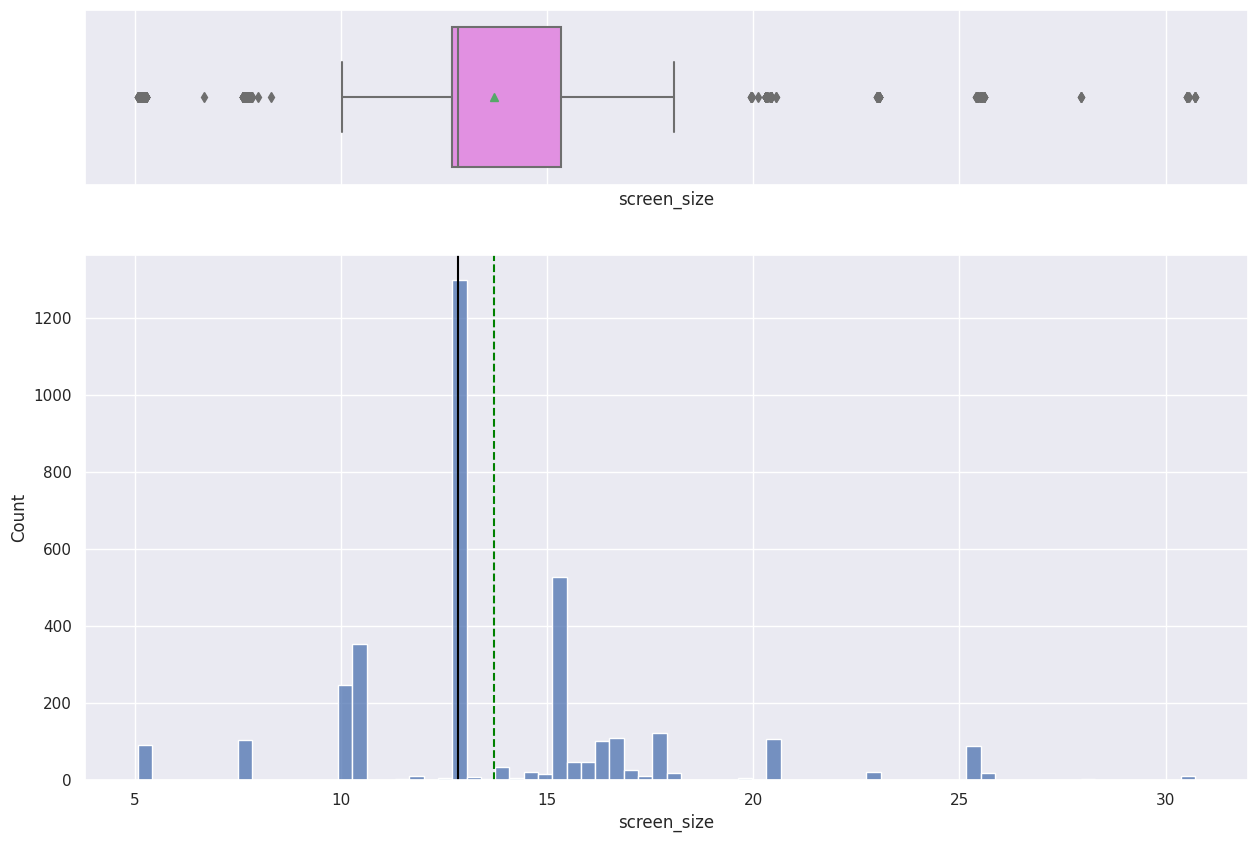

In [ ]:
# Screen Size Plots
histogram_boxplot(data,'screen_size');

- Screen Size varies from ~5 to ~31
- There is a peak at ~13cm (which is the median)
- Most screen sizes are between 10 and 18cm
- Distribution is slightly right skewed with low and high outliers


yes    2335
no     1119
Name: 4g, dtype: int64

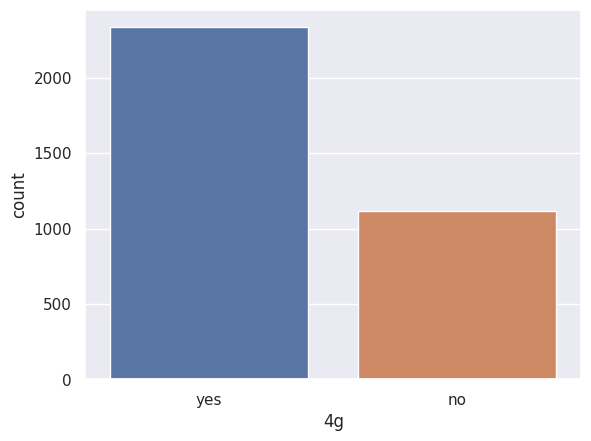

In [ ]:
sns.countplot(data, x='4g');
data['4g'].value_counts()

- Approx. 68% of the devices have 4g capabilities

no     3302
yes     152
Name: 5g, dtype: int64

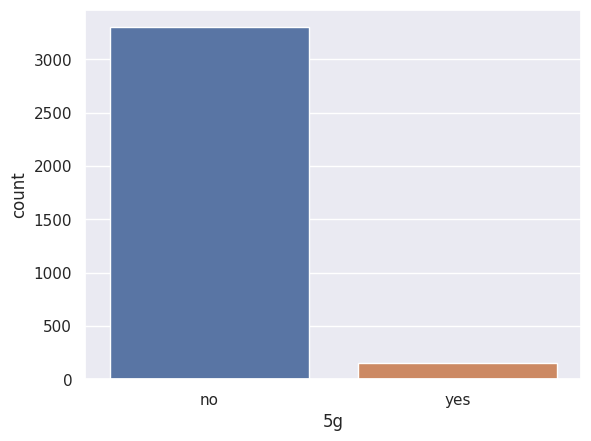

In [ ]:
sns.countplot(data, x='5g');
data['5g'].value_counts()

- Approx. 4% of the devices have 5g capabilites

- There are 2487 devices with 4g or 5g, which is approx. 72%
  - This means there is approx. 28% of the devices that don't have 4g or 5g

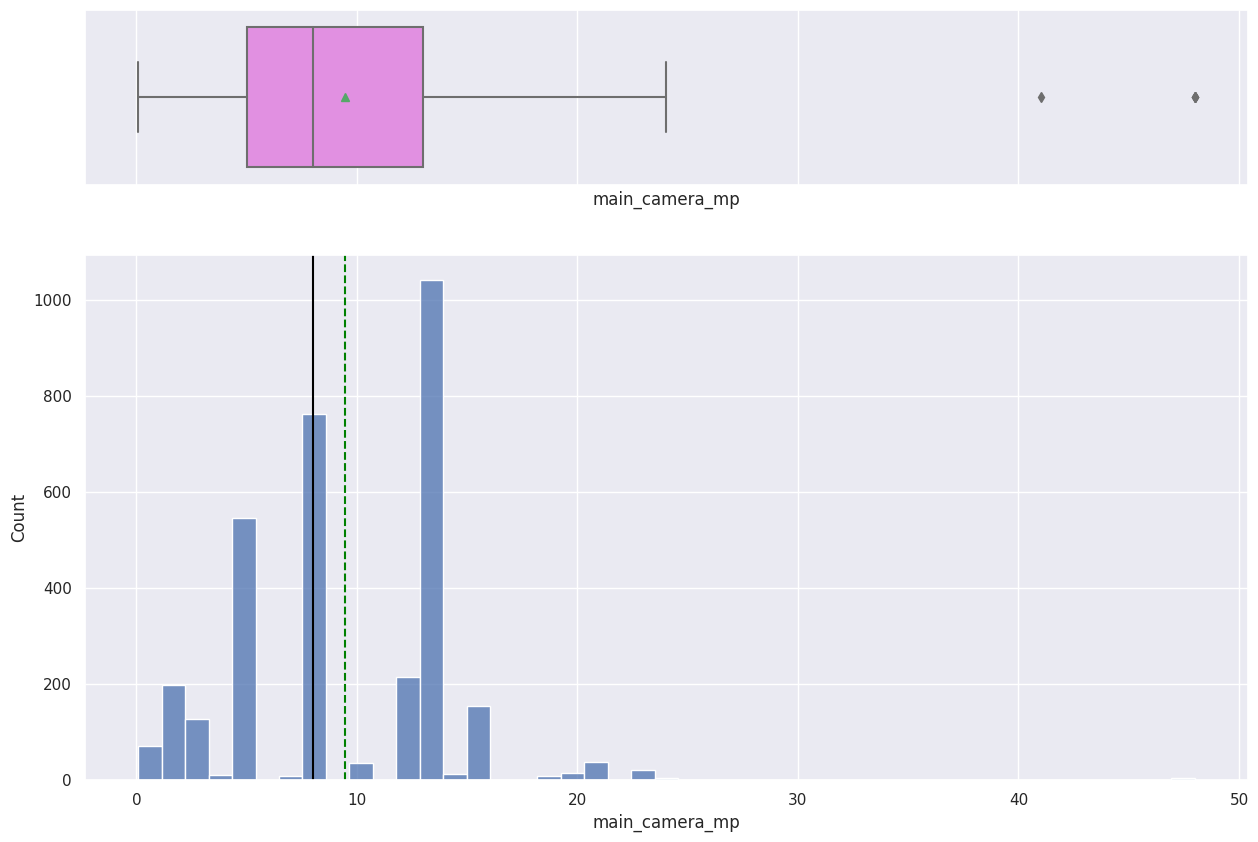

In [ ]:
# Main Camera Mega-Pixels plots
histogram_boxplot(data,'main_camera_mp');

- Main camera distribution for the devices is right skewed
- Median of 8mp and a mode of 13
- There are a few high outliers
- Range of approx. 48

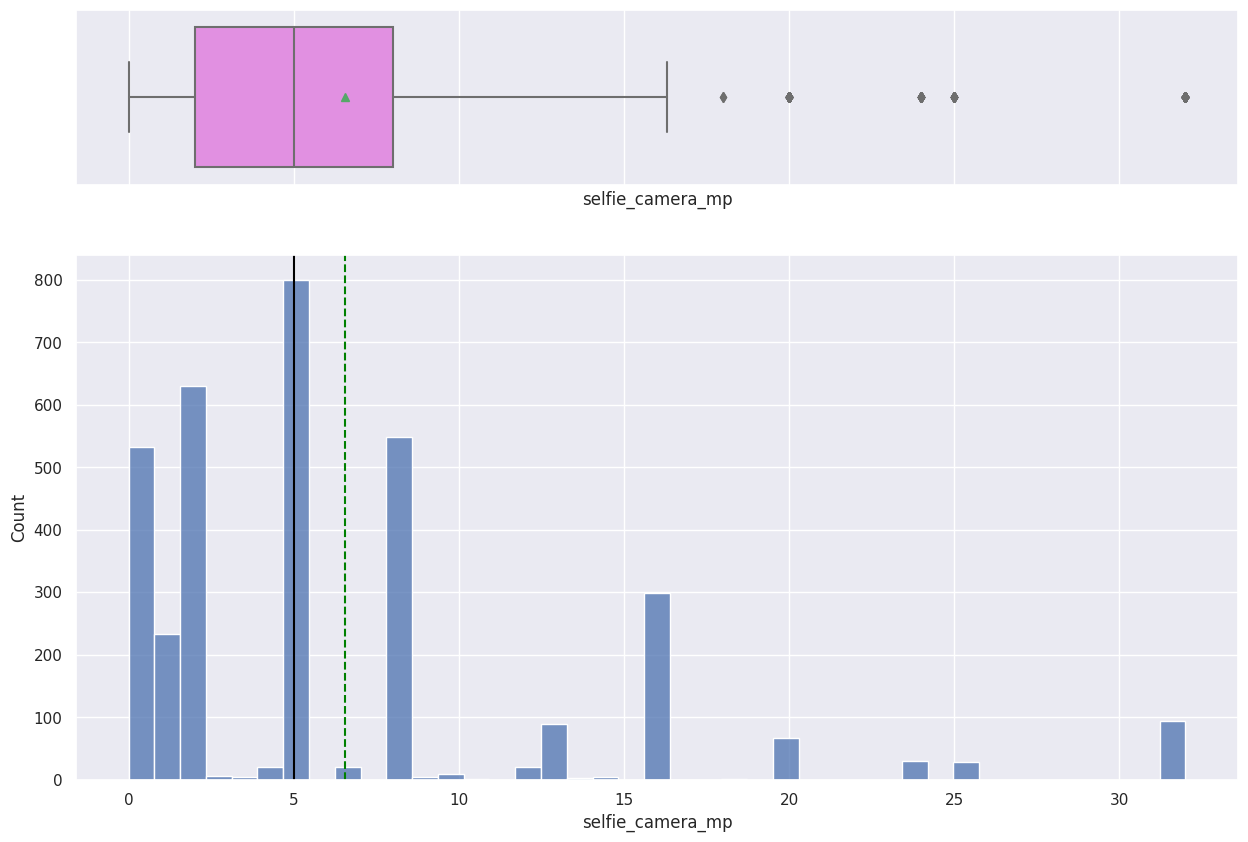

In [ ]:
# Selfie Camera Plots
histogram_boxplot(data,'selfie_camera_mp');

- Selfie camera distribution for the devices is right skewed
- Median and mode of 5mp
- There are a few high outliers
- Range of 32

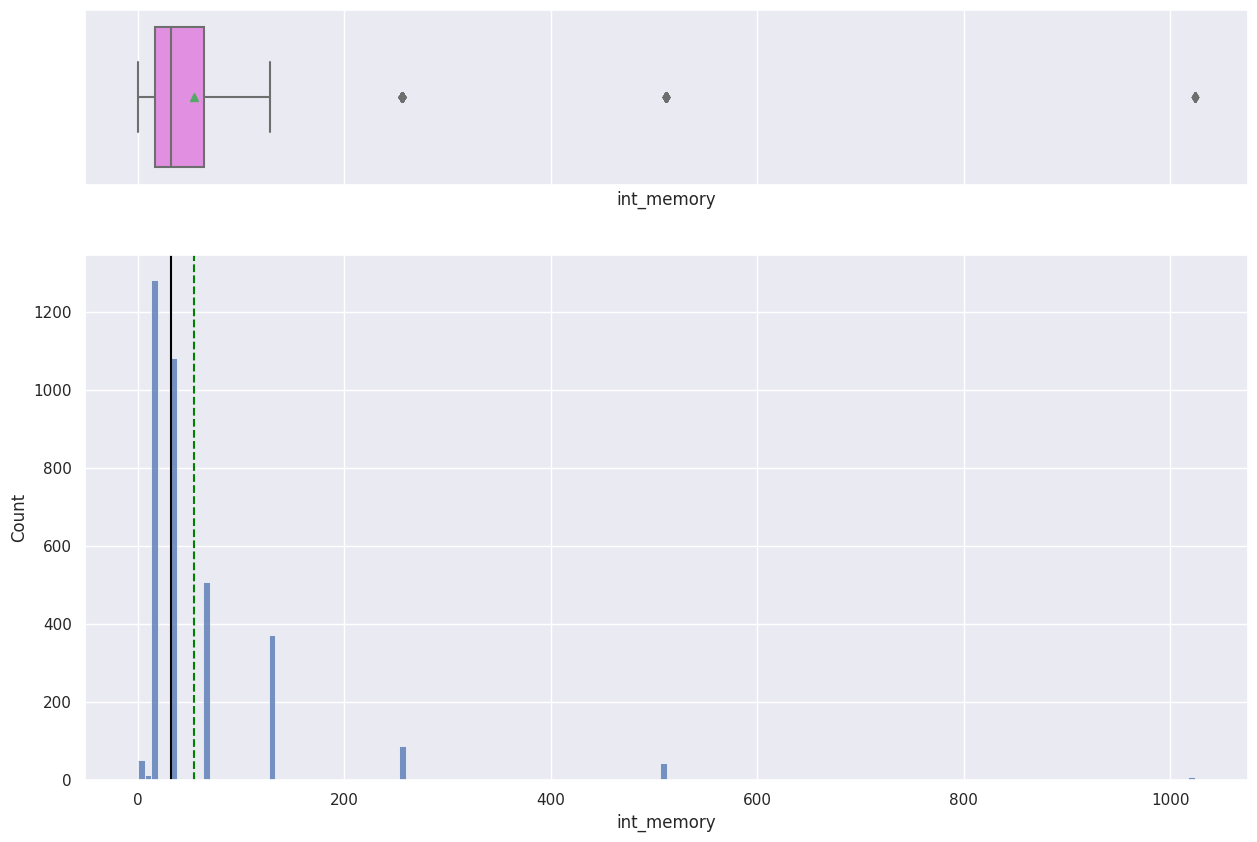

In [ ]:
# Internal Memory Plots
histogram_boxplot(data,'int_memory');

- Internal Memory distribution is heavily skewed right
- Median of 32GB and a mode of 16
- There are a few high outliers
- Range of approx. 1024

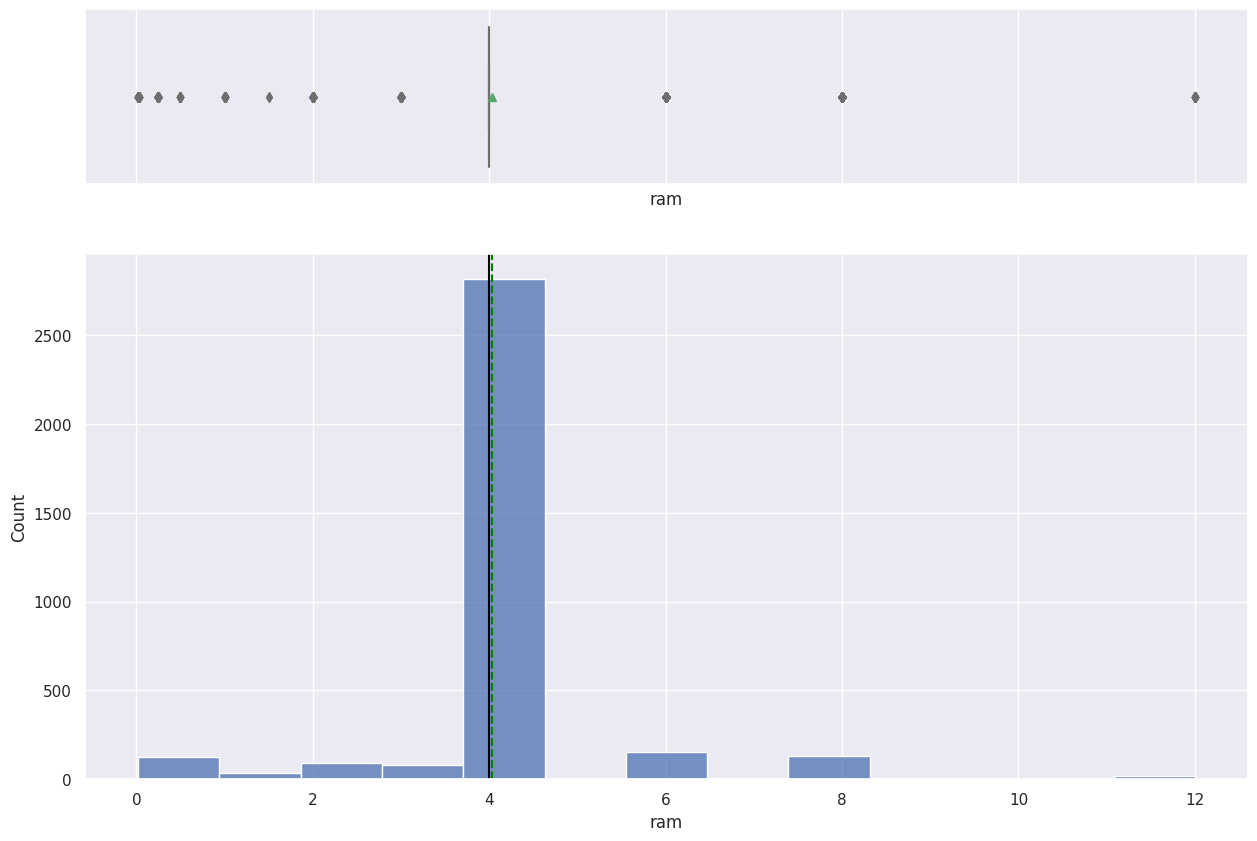

In [ ]:
# RAM plots
histogram_boxplot(data,'ram');

- Majority of the RAM is 4GB for these devices
- Range is approx 12

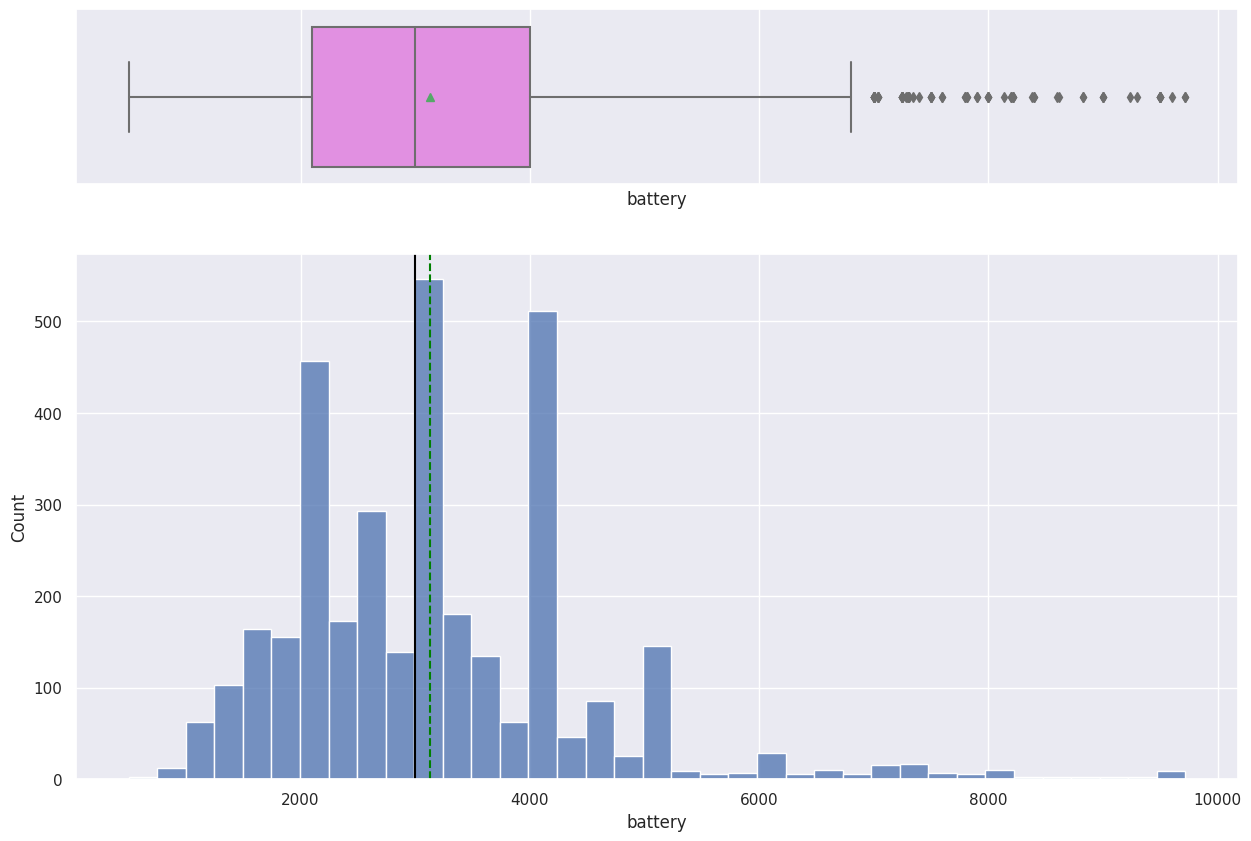

In [ ]:
# Battery Plots
histogram_boxplot(data,'battery');

- Battery distribution is skewed right
- Median of 3000mAh
- There are a several high outliers
- Range of approx. 9220

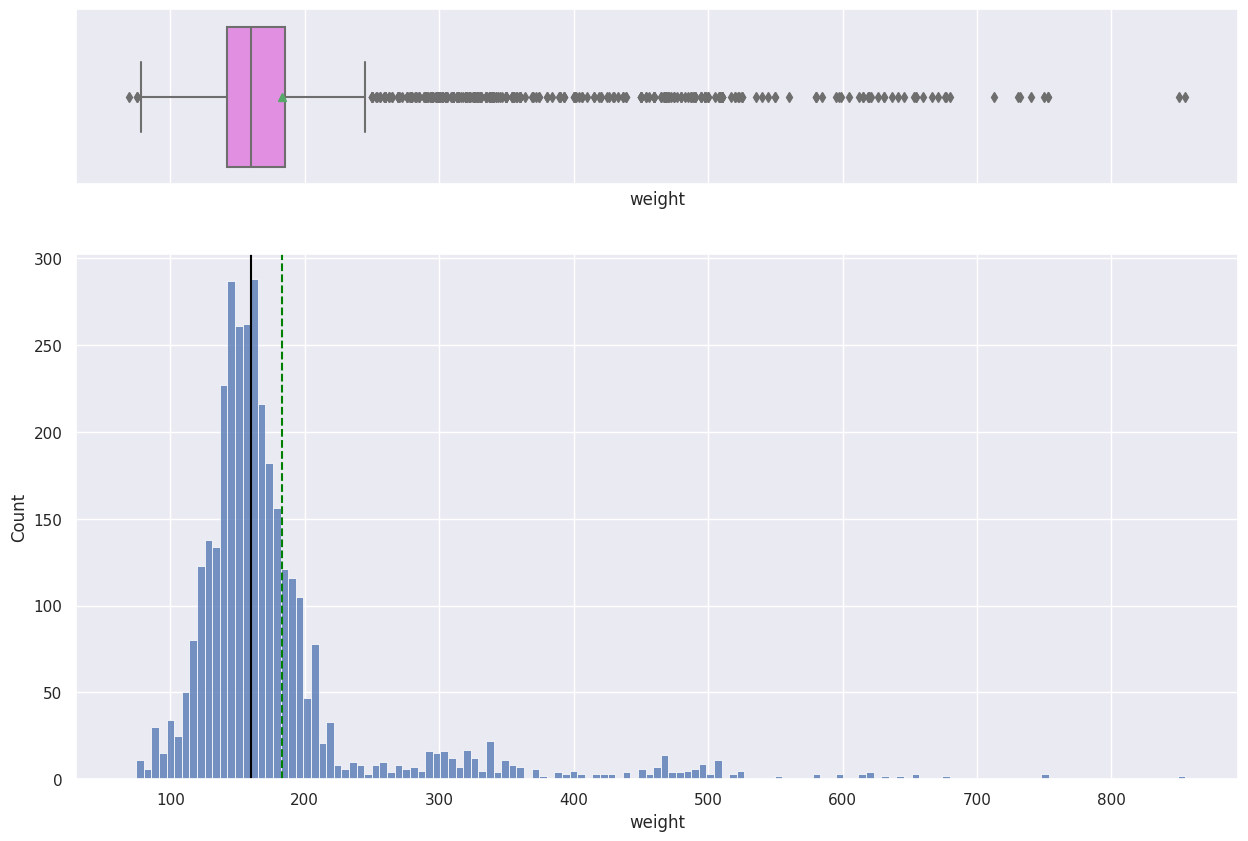

In [ ]:
# Weight of devices plots
histogram_boxplot(data,'weight');

- Weight distribution is skewed right
- Median of 160grams
- There are a several high outliers and a few low outliers
- Range of approx. 786

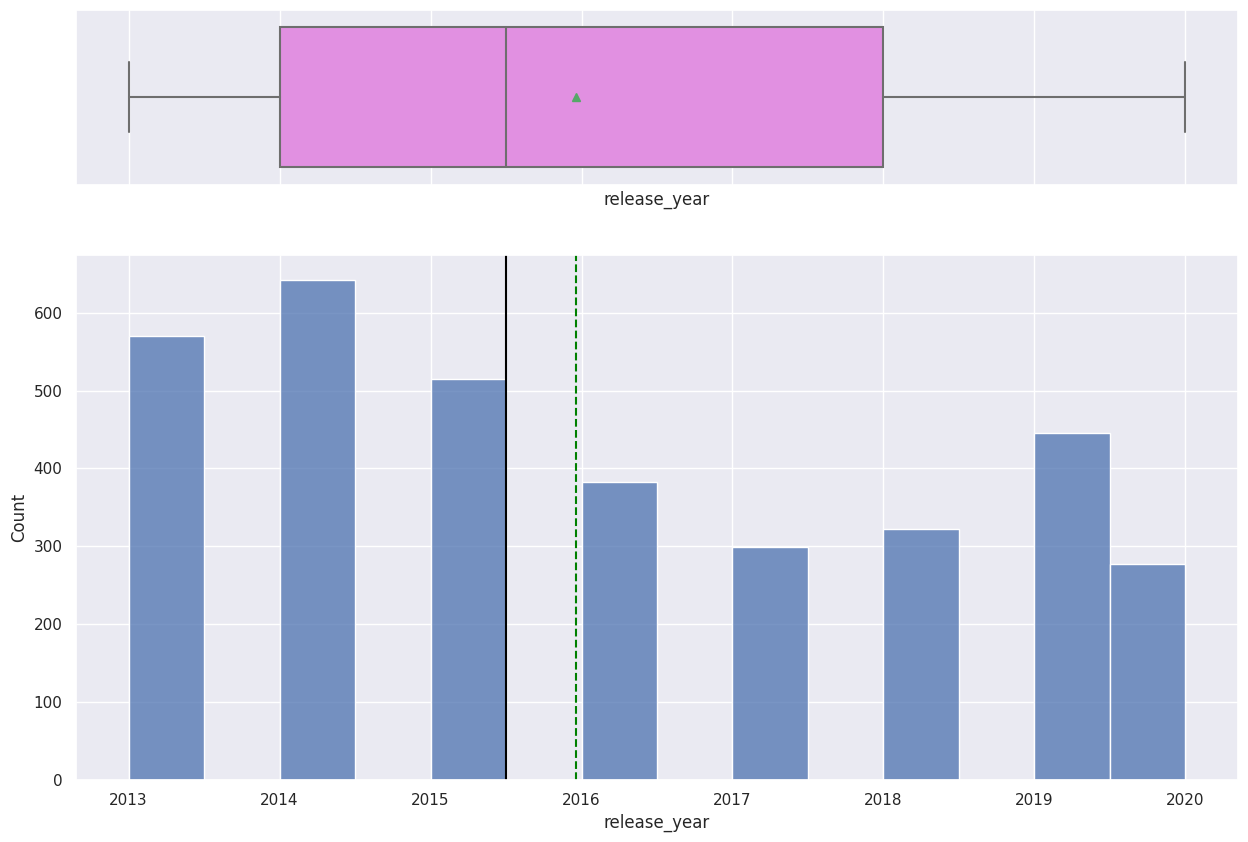

In [ ]:
# Release Year Plots
histogram_boxplot(data,'release_year');

- Release Year distribution is slightly right skewed with no outliers
- Median of 2015 and mode of 2014
- The range is 7, Years 2013-2020

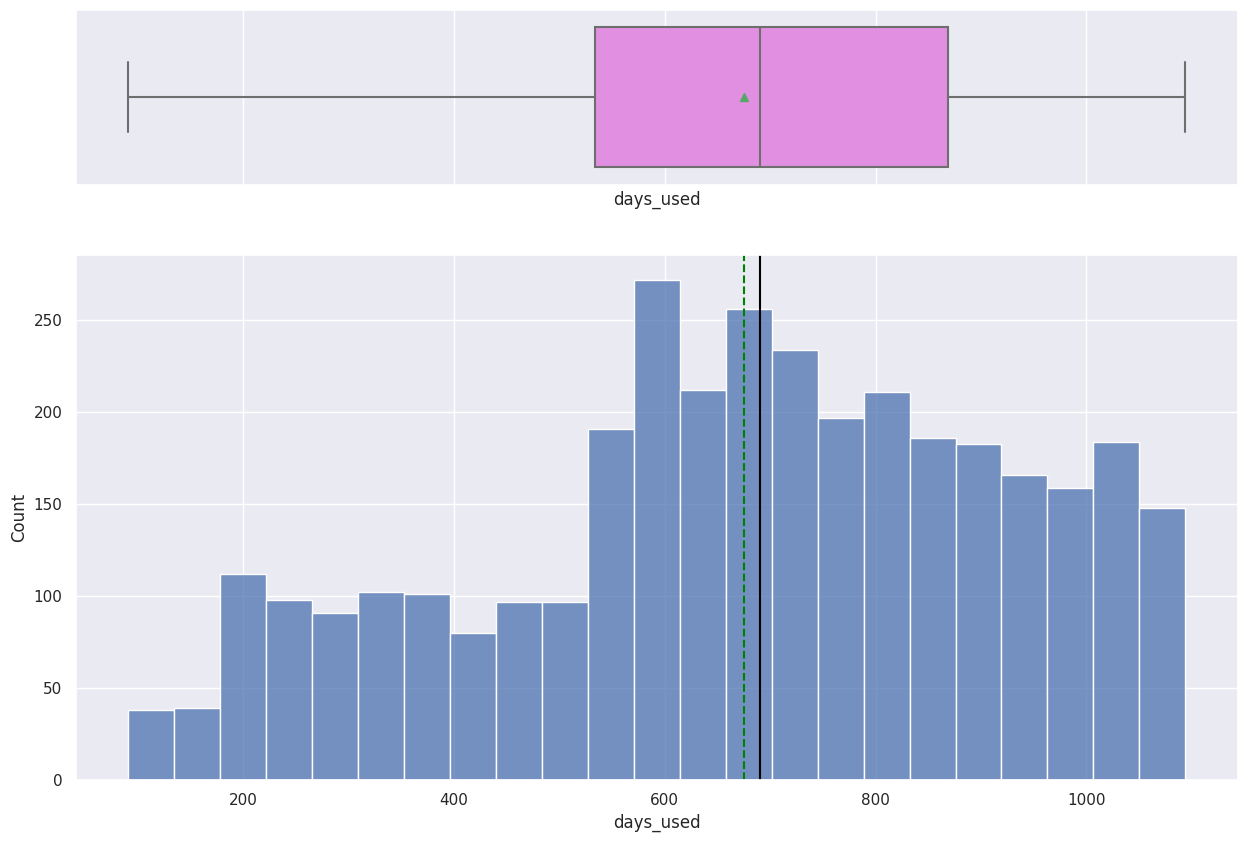

In [ ]:
# Number of days the device was used plots
histogram_boxplot(data,'days_used');

- Days used distribution is left skewed with no outliers
- Median of approx. 690days
- Range of approx. 1000days

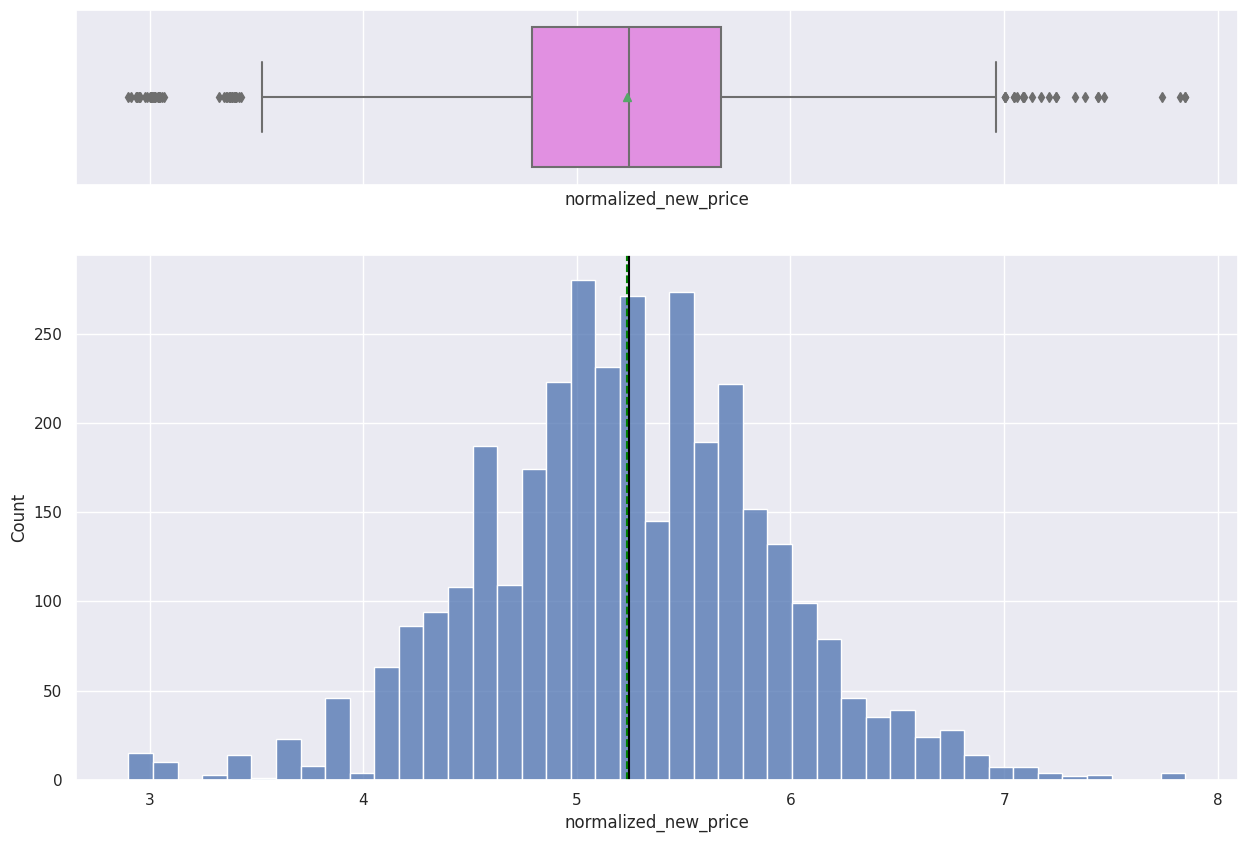

In [ ]:
# Normalized New Price plots
histogram_boxplot(data, 'normalized_new_price');

- The normalized new price distribution is approx. symmetrical (bell-shaped)
- Mean of approx. 4.365 and median of approx. 4.405
- Range of approx. 5.1
- High and low outliers are present

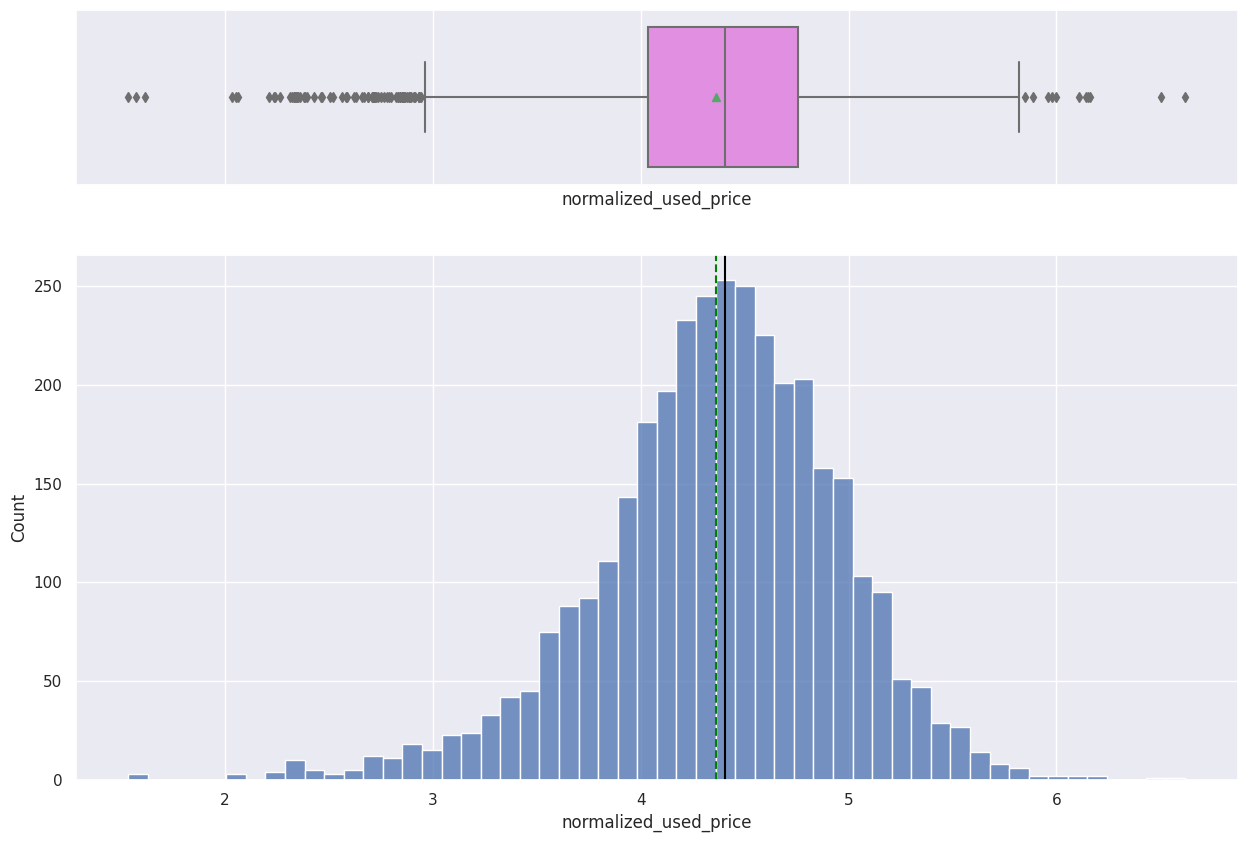

In [ ]:
histogram_boxplot(data, 'normalized_used_price');

- The distribution of normalized used price distribution is slightly left skewed with a bell-shape curve.
- Mean of approx. 5.233 and median of  approx. 5.246
- Range of approx. 4.9
- High and low outliers are present

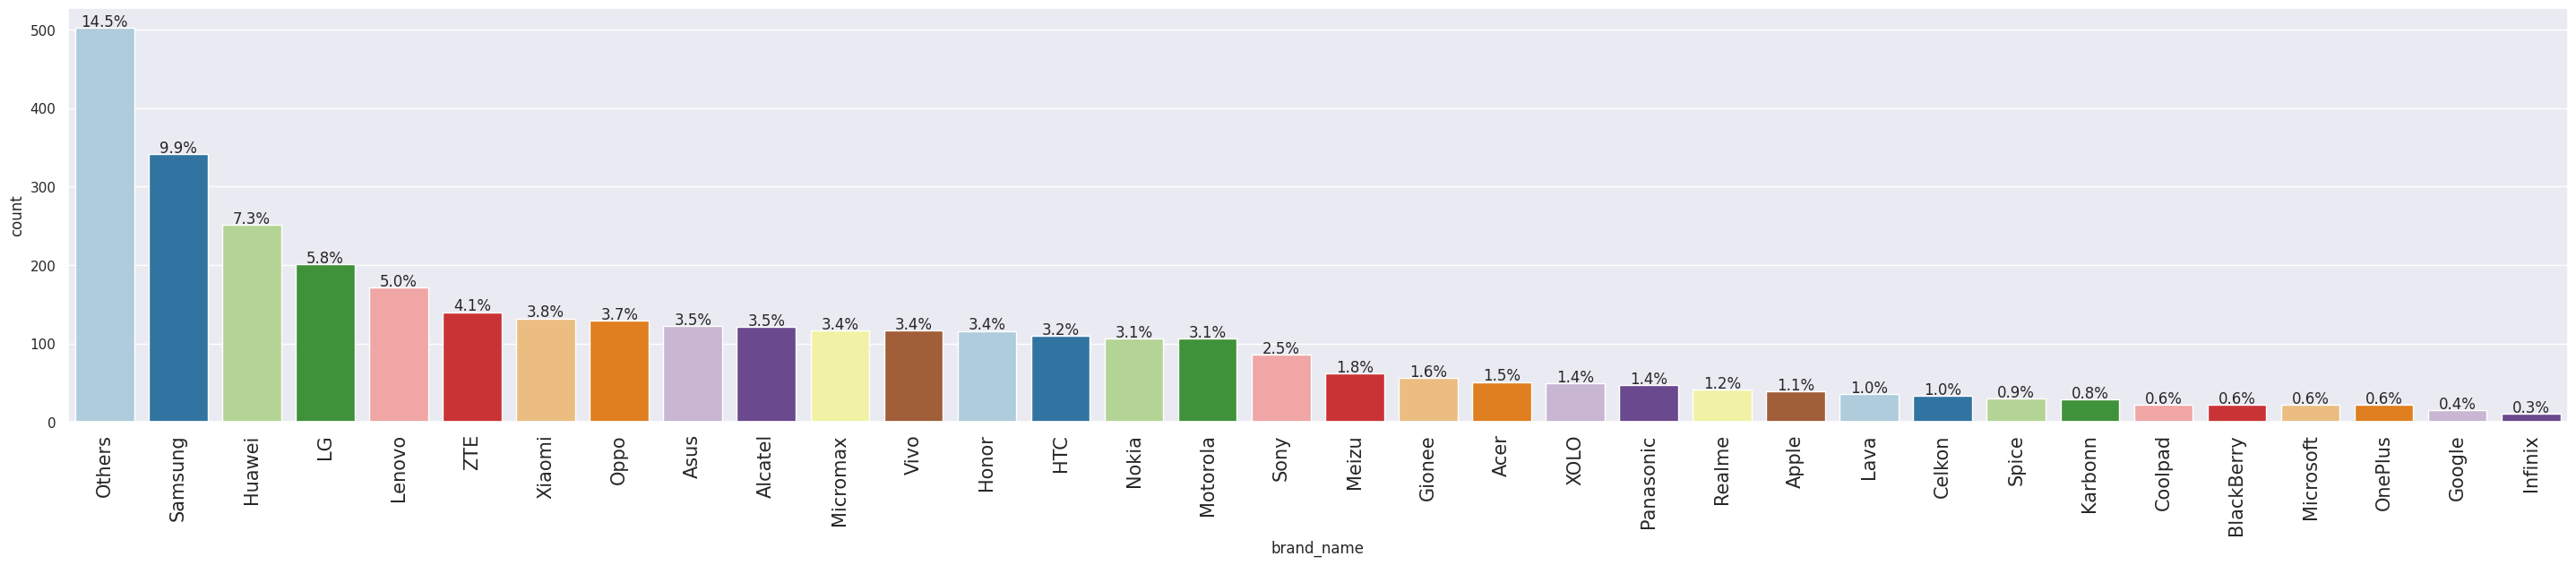

In [ ]:
# Brand of devices
labeled_barplot(data,'brand_name' , perc=True)

- Other brands make up 14.5% of the devices, followed by Samsung (9.9%), Huawei(7.3%), and LG (5.8%)

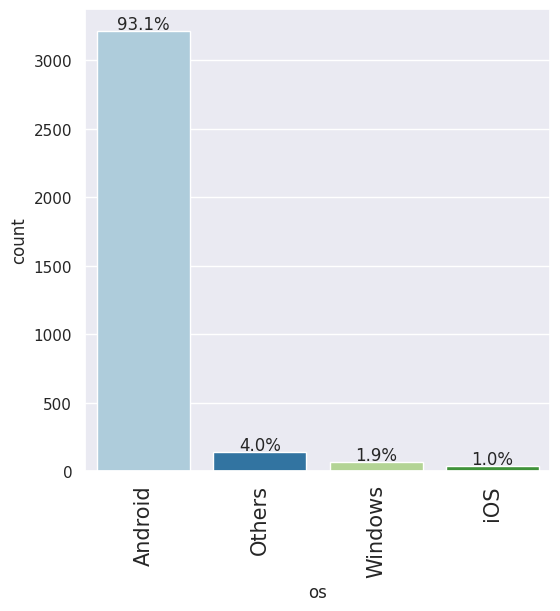

In [ ]:
# Operating Systems
labeled_barplot(data, 'os', perc=True)

- Android Operating System makes up 93.1% of the used devices on the market

In [ ]:
# Creating dataframes for large (>4500mAh) and small batteries (<=4500)
data_large_battery = data[data['battery']>4500]
data_small_battery = data[data['battery']<=4500]

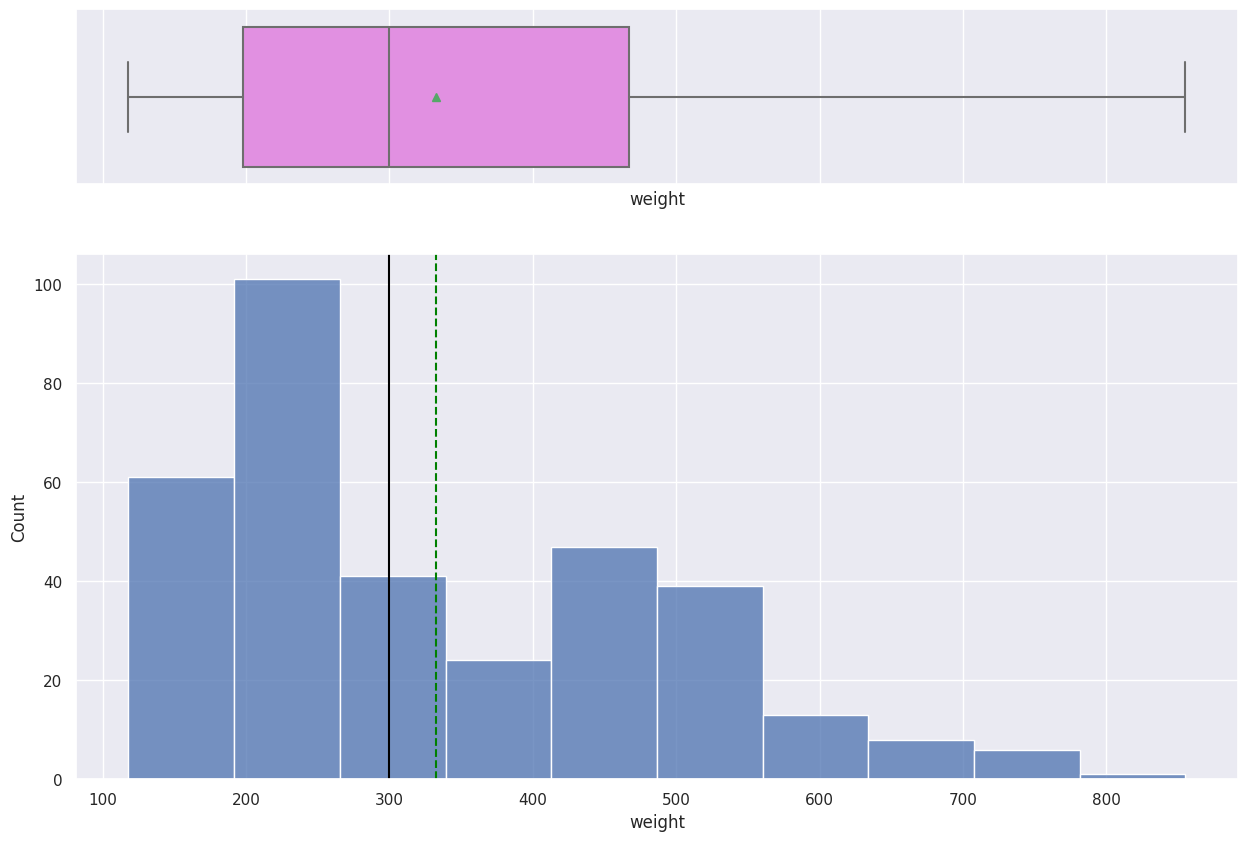

In [ ]:
# Distribution of Weights for large batteries
histogram_boxplot(data_large_battery, 'weight');

The distribution of weights of large battery(>4500mAh) devices is
- Right skewed
- Median of 300grams
- Range is approx 740 (approx 120 to 860grams)
- Majority are between 200 and 500grams.

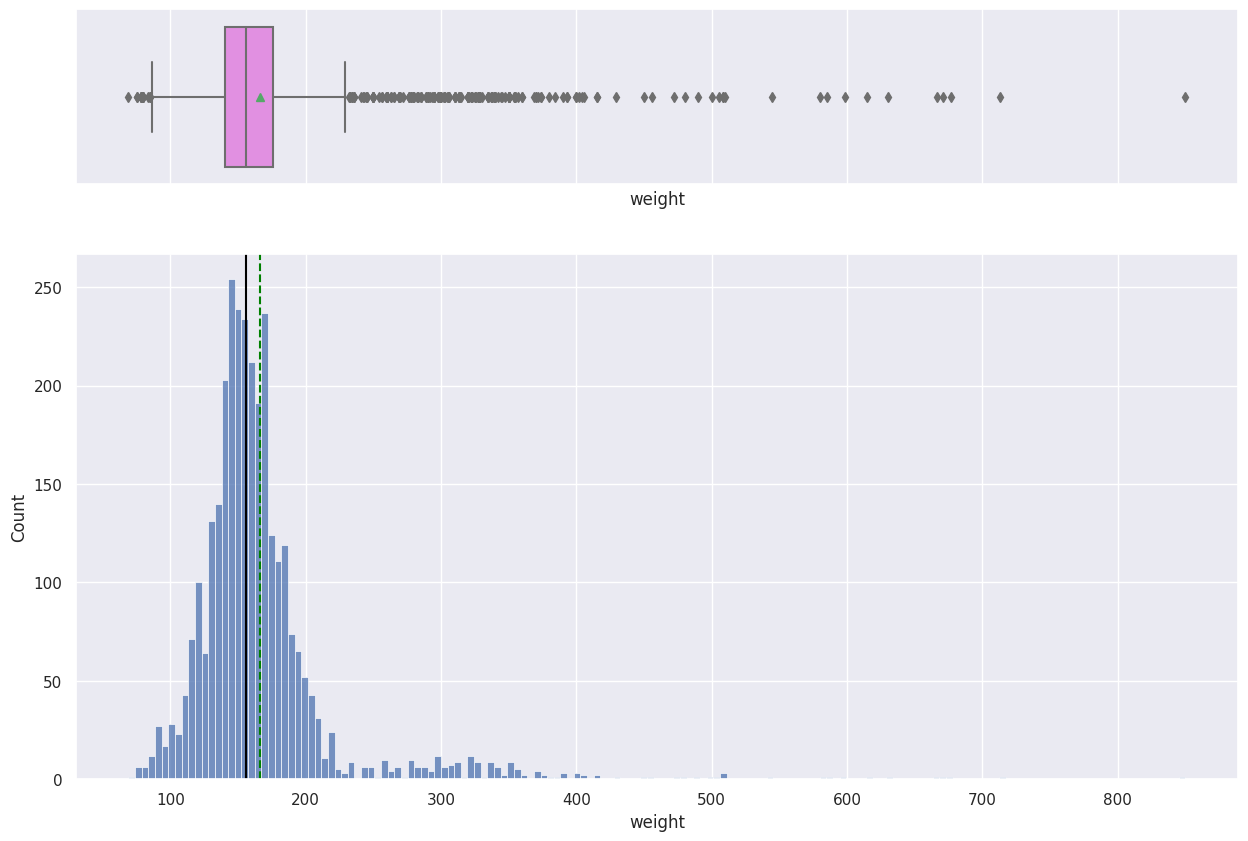

In [ ]:
# Distribution of Weights for small batteries
histogram_boxplot(data_small_battery, 'weight');

- Distribution of weight of small battery devices is skewed right
- A median of approx. 150grams
- Several high outliers (highest approx. 860grams) and a few low outliers

In [ ]:
# Creating a dataframe of large screen devices (> 6 inches (15.24cm))
data_large_screens = data[data['screen_size']>15.24]
data_large_screens.shape

(1099, 15)

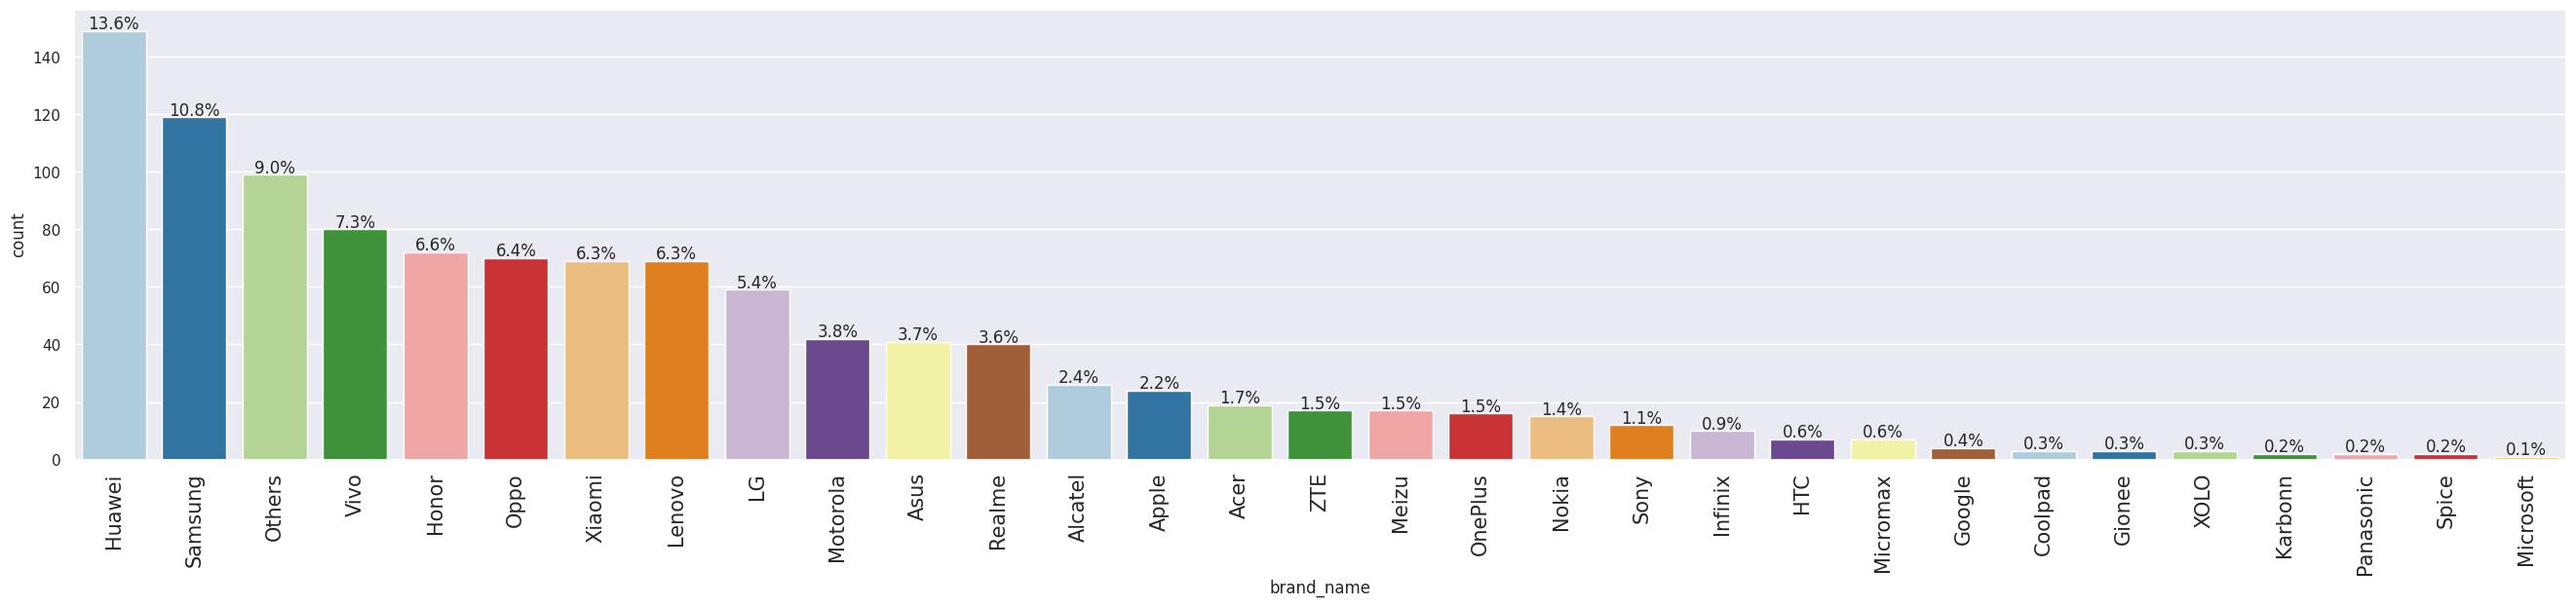

In [ ]:
labeled_barplot(data_large_screens, 'brand_name', perc=True)

- There are 1099 devices that offer a screen greater than 6inches (approx 32% of devices)
- Huawei and Samsung have the highest percentage of screens greater than 6 inches (15.25cm)
- Spice and Microsoft have the lowest percentage of screens greater than 6 inches (15.24)


In [ ]:
# Creating a dataframe for devices with a selfie camera with greater than 8mp
data_selfie = data[data['selfie_camera_mp']>8]
data_selfie.shape

(655, 15)

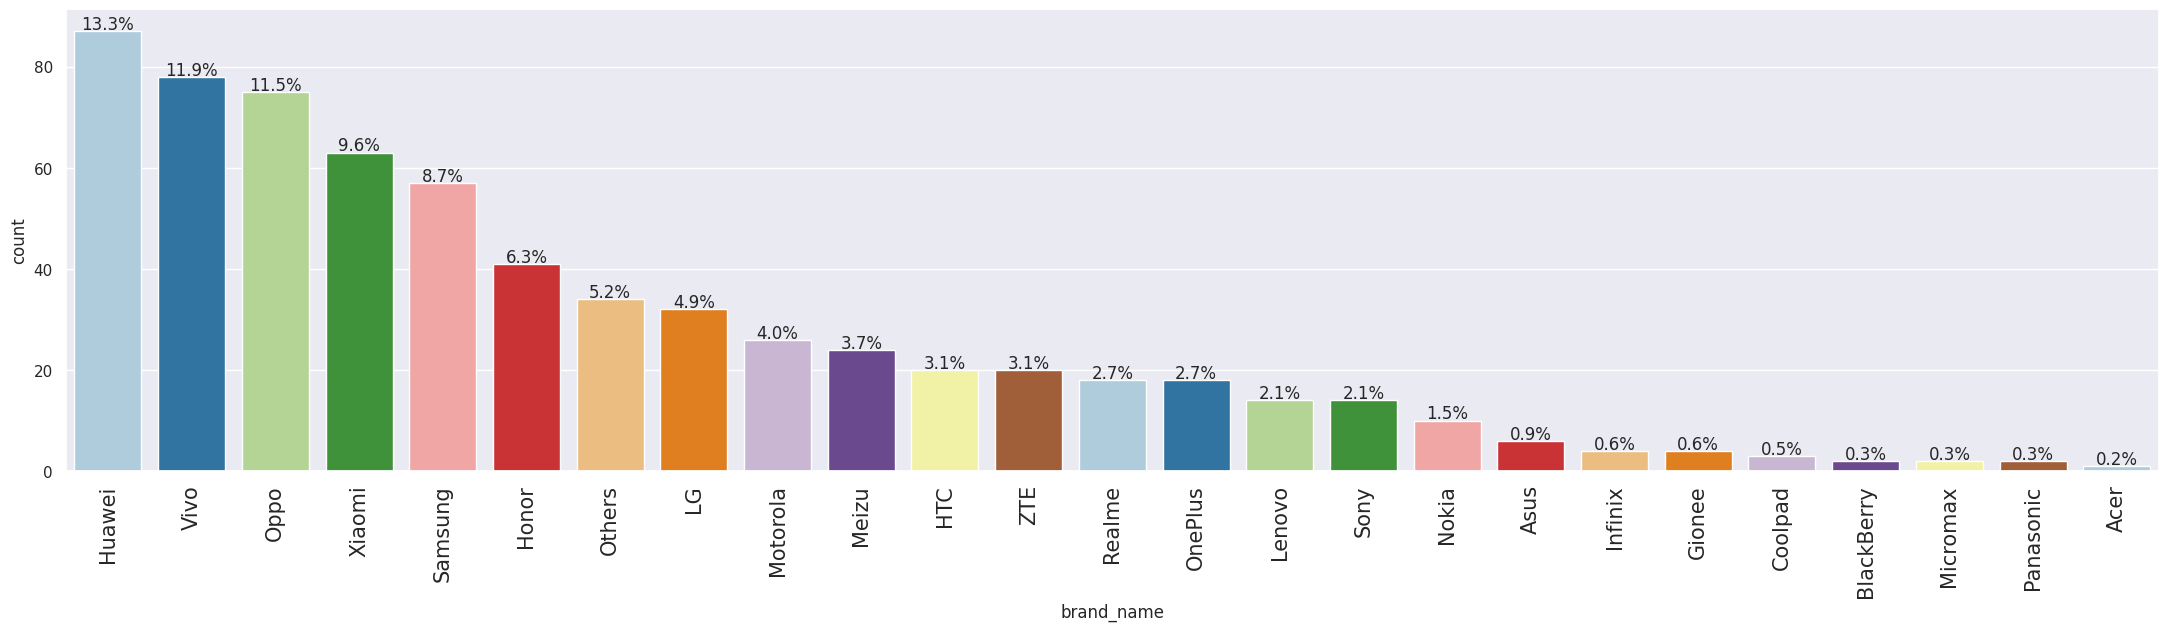

In [ ]:
# Creating a bar plot of selfie cameras greater than 8mp and associated brand
labeled_barplot(data_selfie, 'brand_name', perc=True)

- There are 655 devices that have a selfie camera with megapixels greater than 8 (This is less than 20% of the devices)
- Huawei, Vivo, and Oppo have the greatest percent of larger megapixels for a selfie camera, while BlackBerry, Micromax, Panasonic, and Acer have some of the lowest percents

In [ ]:
# Creating a dataframe for devices with a selfie camera with greater than 16mp
# Main camera should be better than selfie, so I doubled it to 16mp
data_main_camera = data[data['main_camera_mp']>16]
data_main_camera.shape

(94, 15)

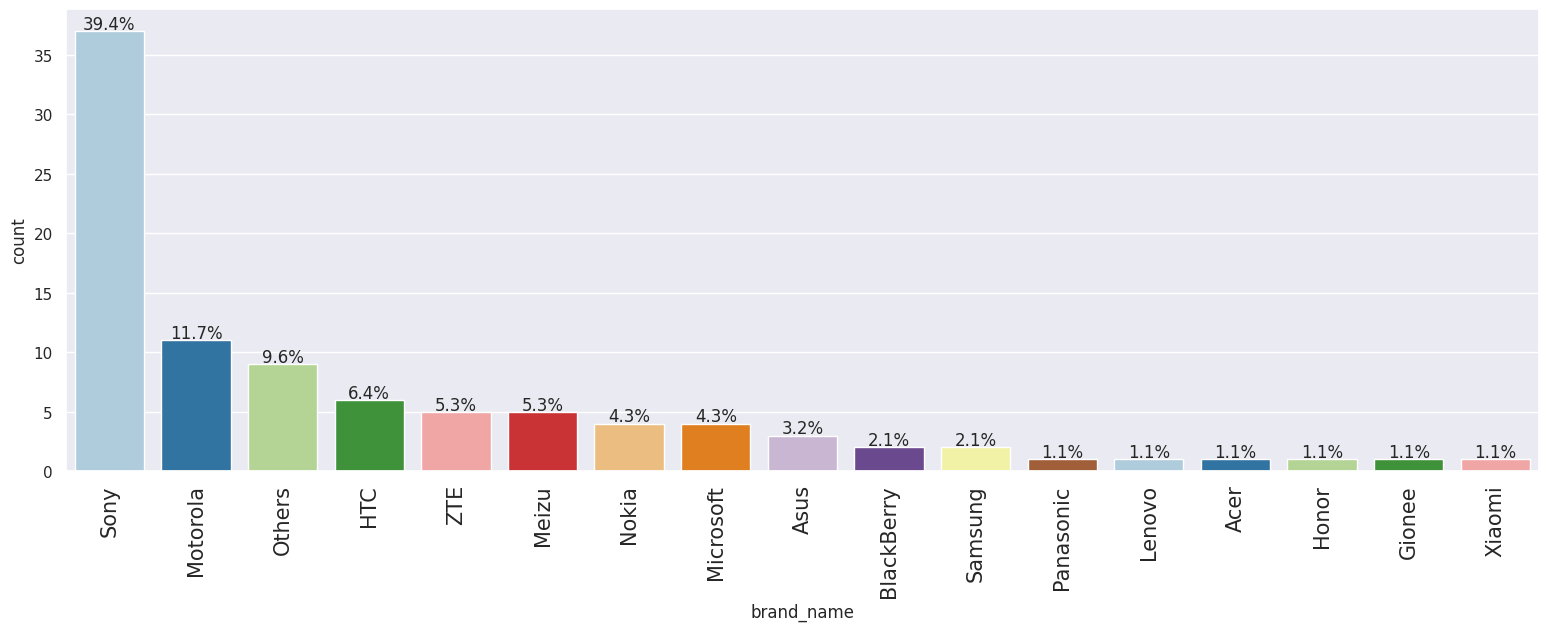

In [ ]:
# Creating a bar plot of main cameras greater than 16mp and associated brand
labeled_barplot(data_main_camera, 'brand_name', perc=True)

- Sony has 39.4% of main camera that are greater than 16mp. This is over tripple the next brand(Motorola)
- Interesting to see the top three (Huawei, Vivo, Oppo) with larger megapixels for the selfie camera not have any for the larger megapixel main camera

###Bivariate Analysis

In [ ]:
#Creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

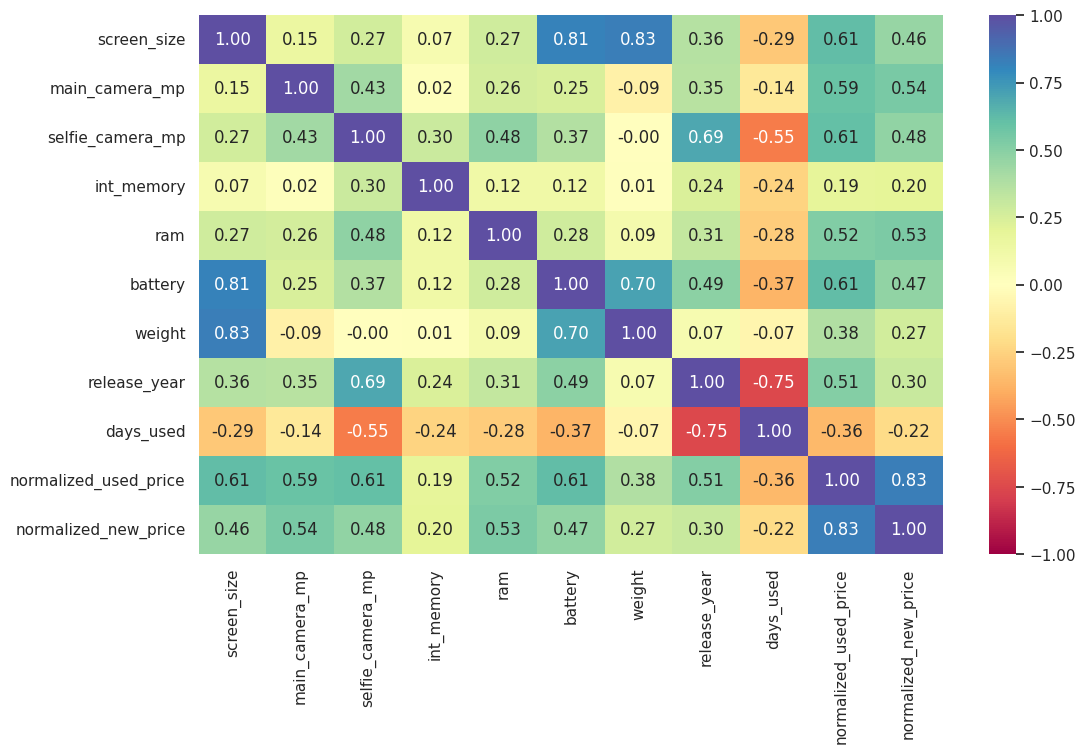

In [ ]:
#Creating heat map of numerical data
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- There is a moderately strong positive correlation between screen size and battery
- There is a moderately strong positive correlation between screen size and weight
  - This makes sense since a larger screen is going to weigh more and it will need a bigger battery to run a larger screen

- There is a moderately positive strong correlation between new and used normalized prices, which makes sense because if the device was expensive new, then used it will still be relatively more expensive compared to cheaper options

- There is a moderate negative correlation between number of days used and release year.  
- Normalized used price is highly positively correlated to the normalized new price, which makes sense if something was expensive new, a used one will still be a bit pricy
- There are four attributes that have a moderate positive correlation with the normalized used price and these are: screen size, battery, selfie camera, and main camera

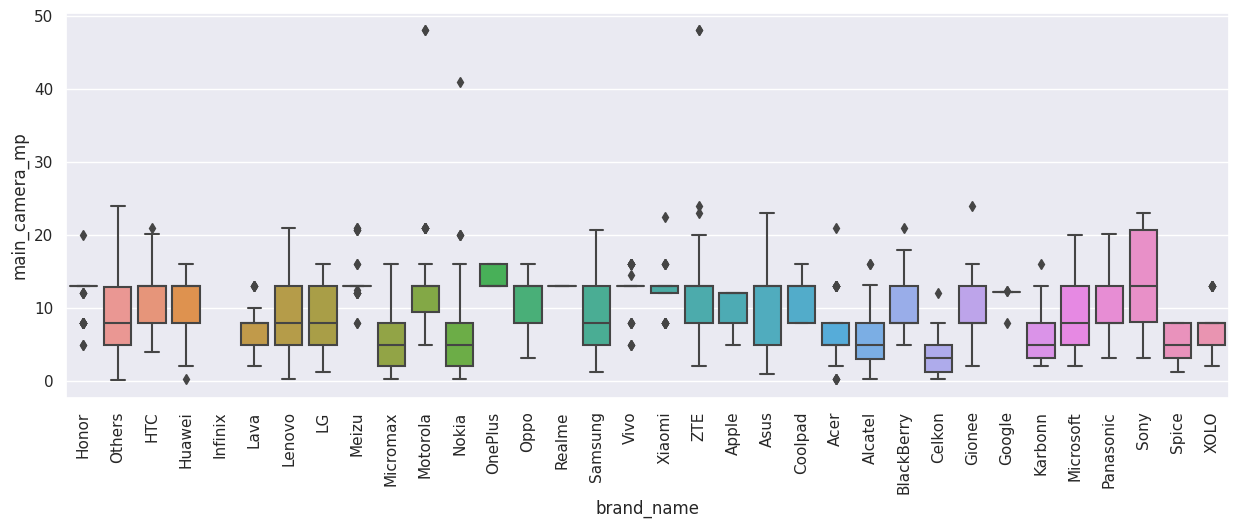

In [ ]:
# Comparing brand name and main camera
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='brand_name', y='main_camera_mp');
plt.xticks(rotation=90);

- It appears most brands stay within a certain range of main camera size except for a few outliers
- Infinix has no data for main camera mp

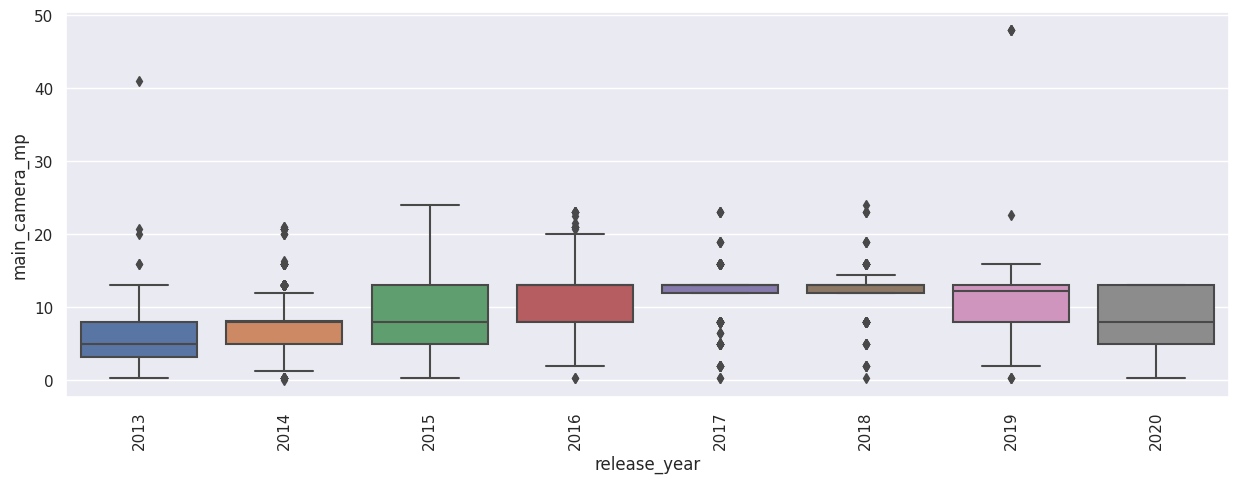

In [ ]:
#Comparing release year and main camera
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='release_year', y='main_camera_mp');
plt.xticks(rotation=90);

- It appears main camera increased from 2013 to 2018 and then started to get smaller again the next couple of years
    - This might have to do with the trend of what consumers were wanting, could be realized the larger megapixels didn't make much difference for what the consumer was needing

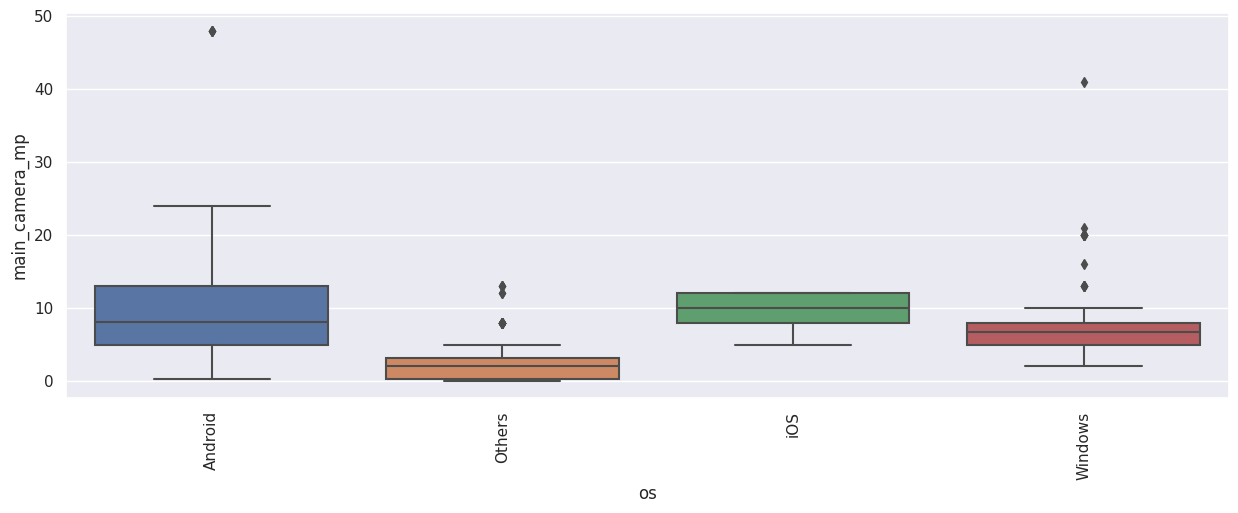

In [ ]:
#Comparing operating system and main camera
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='os', y='main_camera_mp');
plt.xticks(rotation=90);

- iOS opperating system seems to have the most mp for the main camera
- Other operating systems appear to have lower mp for the main camera

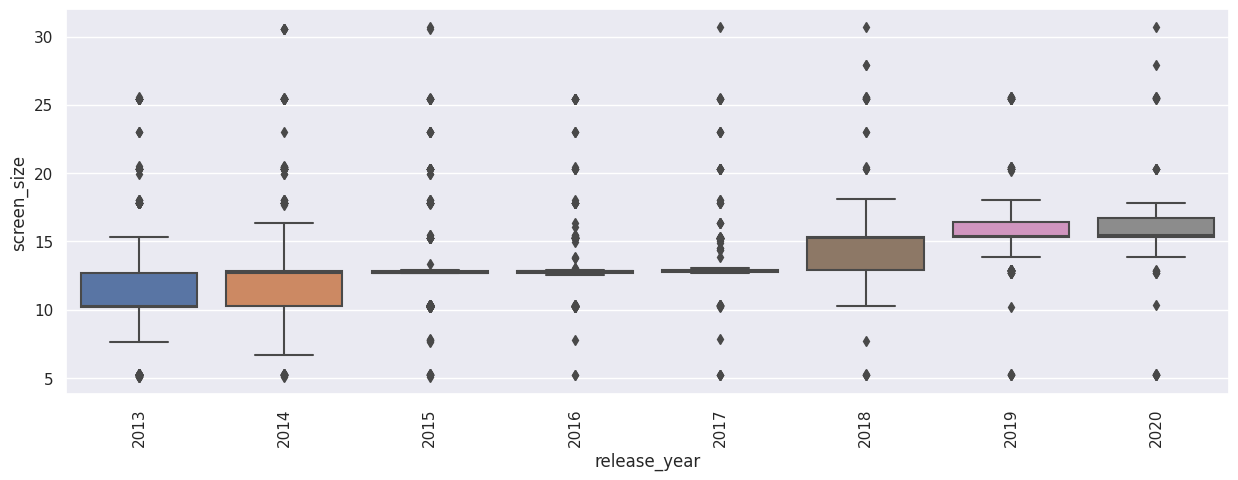

In [ ]:
#Comparing release year and screen size
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='release_year', y='screen_size');
plt.xticks(rotation=90);

- It appears screen size increased through the years, but screen size stayed relatively the same for the years 2015-2017

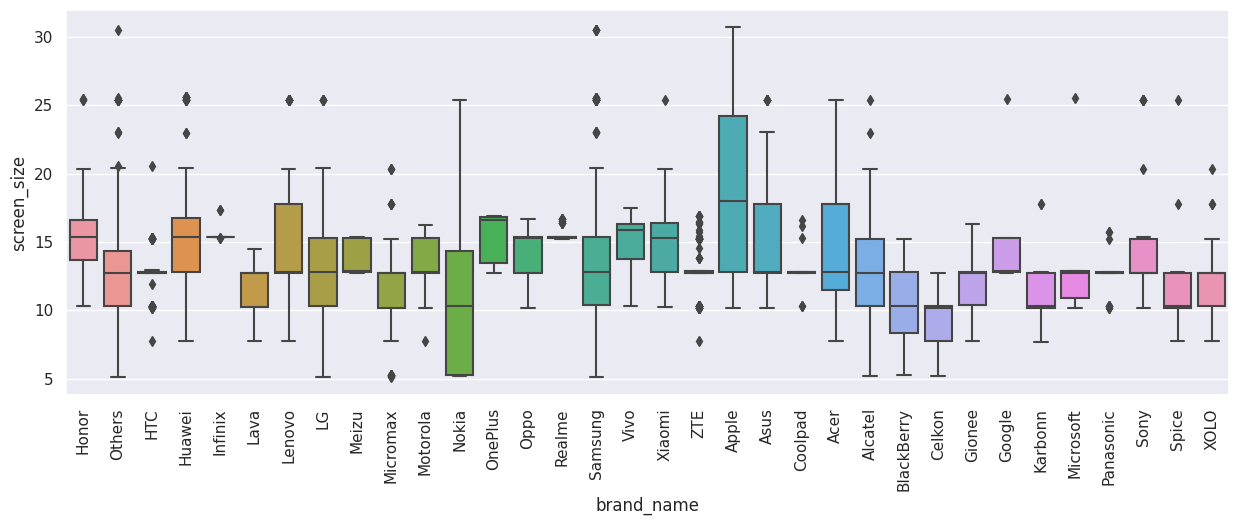

In [ ]:
#Comparing brand name and screen size
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='brand_name', y='screen_size');
plt.xticks(rotation=90);

- Apple devices seem to have larger screens
- Celkon devices generally have smaller screens

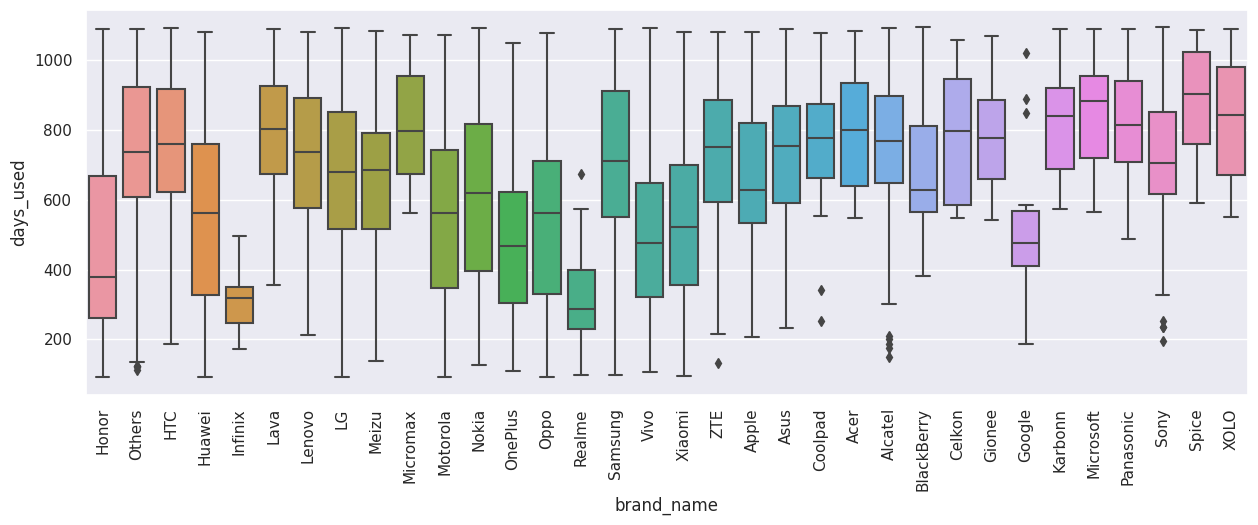

In [ ]:
#Comparing brand name and days used
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='brand_name', y='days_used');
plt.xticks(rotation=90);

- Spice devices appear to be used the most before they are refurbished
- Infinix devices have the lowest number of days used before refurbished

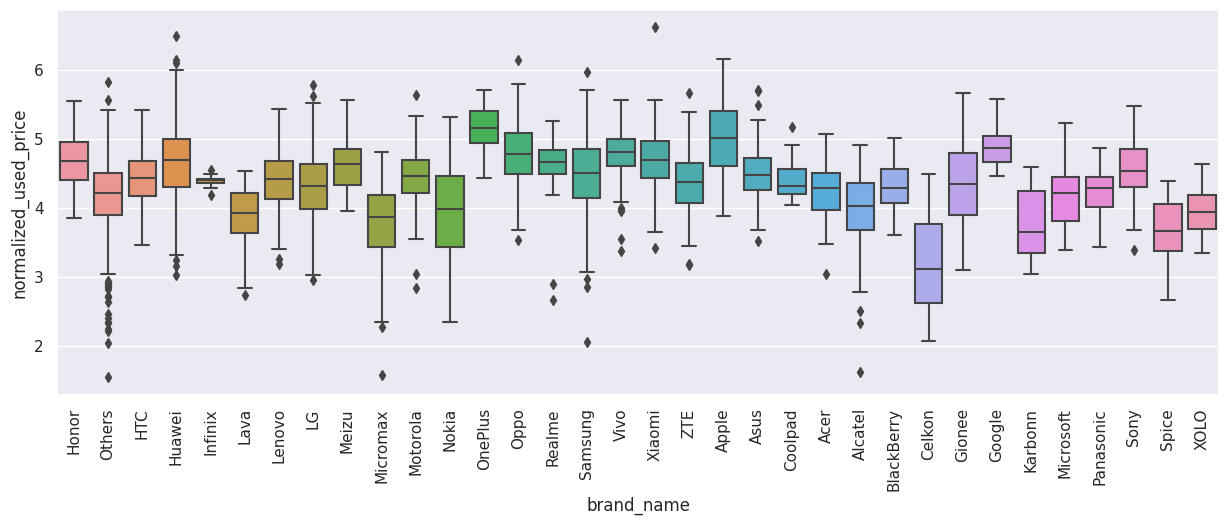

In [ ]:
#Comparing brand name and normalized used price
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='brand_name', y='normalized_used_price');
plt.xticks(rotation=90);

- OnePlus and Apple devices have higer normalized used price
- Celkon has a lower normalized used price

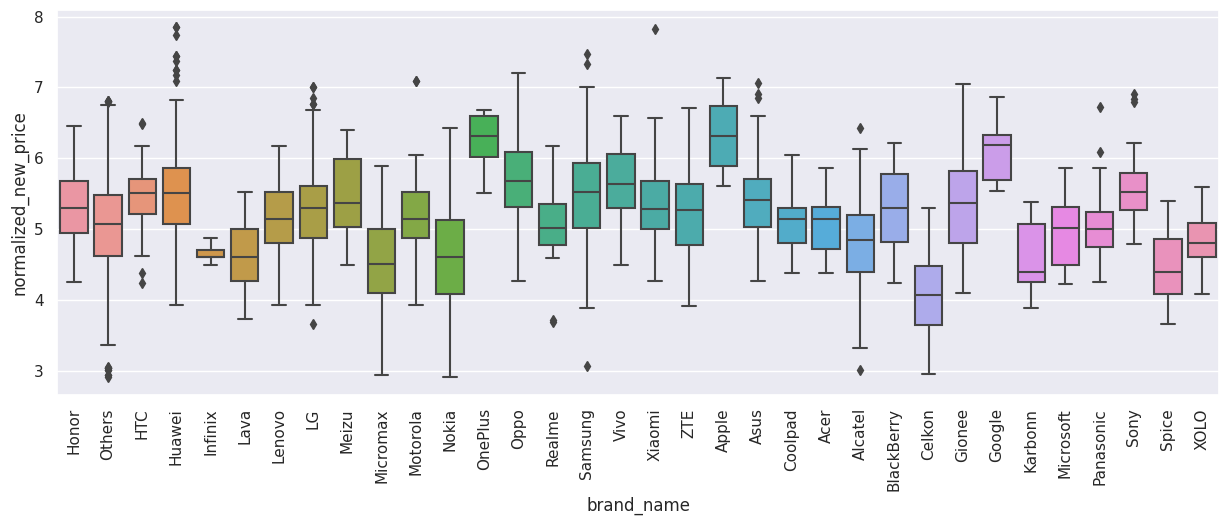

In [ ]:
#Comparing brand name and normalized new price
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='brand_name', y='normalized_new_price');
plt.xticks(rotation=90);

- OnePlus and Apple devices have higer normalized new price
- Celkon has a lower normalized new price

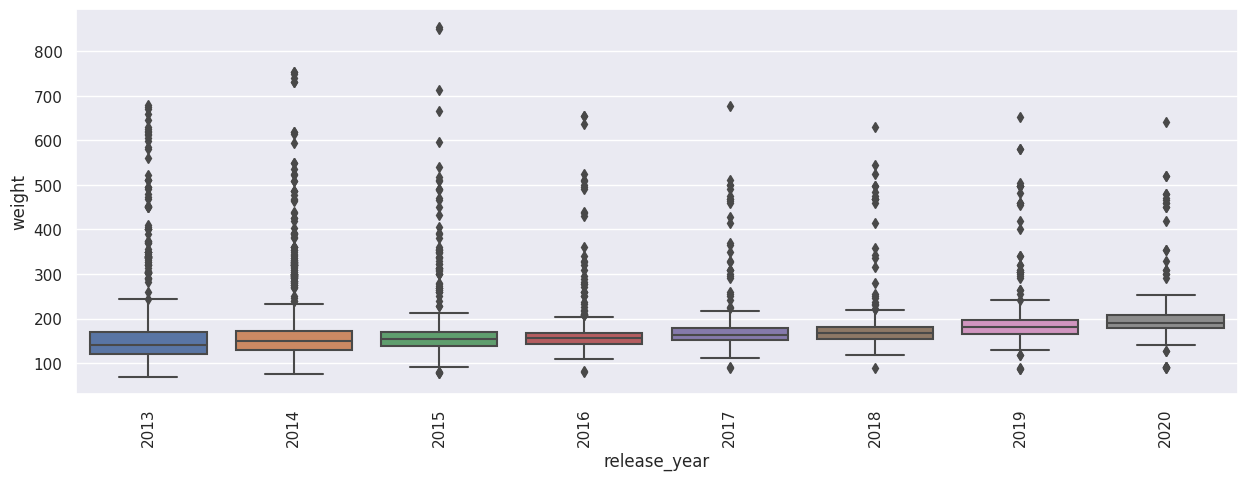

In [ ]:
# Comparing release year and weight
plt.figure(figsize=(15, 5))
sns.boxplot(data, x='release_year', y='weight');
plt.xticks(rotation=90);

- It appears the weight(based on the median) of the device increased each year

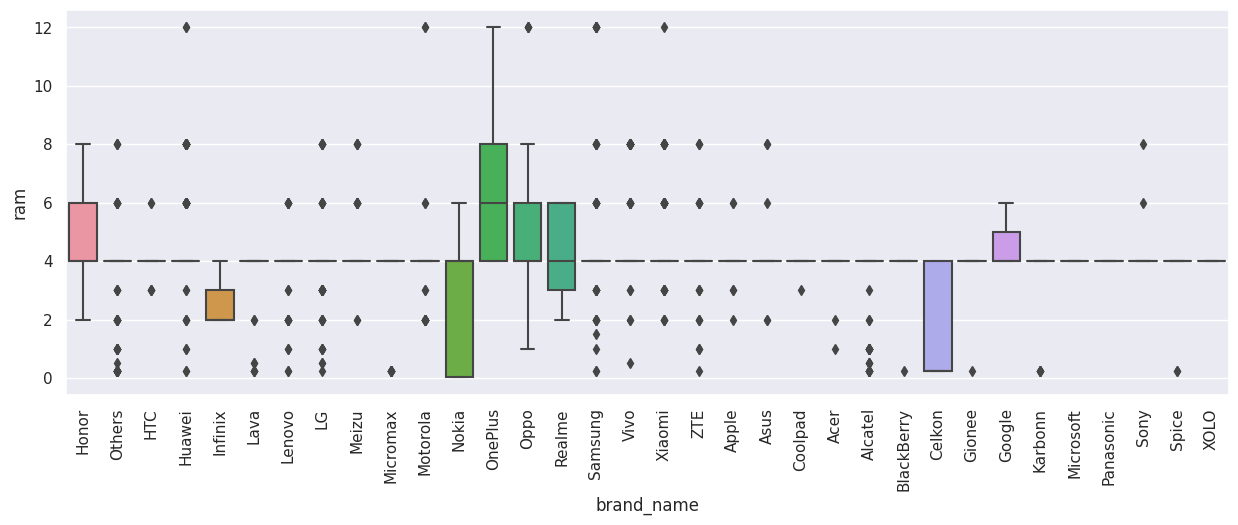

In [ ]:
# Comparing Brand name and RAM
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x='brand_name', y='ram');
plt.xticks(rotation=90);

- Brand name and amount of RAM offered varies between devices with many outliers, but the majority of them have a median of 4GB.  
- OnePlus has a higher amount of RAM with a median of 6GB.
- Infinix has a median of 3GB or below.
- Honor, OnePlus, Oppo, and Google have majority of their devices above 4GB of RAM
- Infinix, Nokia, and Celkon have majority of their devices below 4GB of RAM

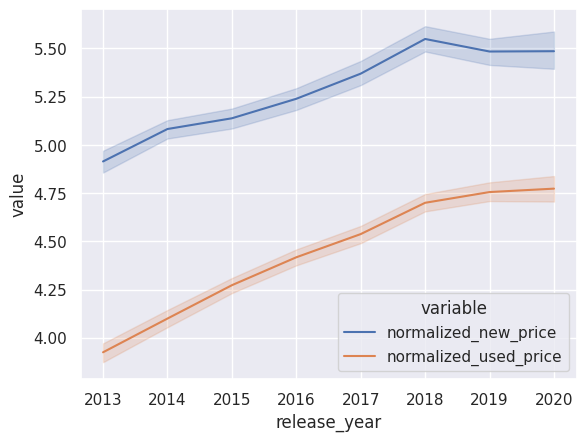

In [ ]:
# Looking at Normalized values for new and used for years 2013 - 2020
sns.lineplot(x='release_year', y='value', hue='variable',
             data=pd.melt(data, id_vars='release_year', value_vars=['normalized_new_price', 'normalized_used_price']));

- There normalized new price increase from 2013 to 2018, but then declines from 2018 to 2019, and stays almost constant from 2019 to 2020
- There was a mostly steady increase from 2013 to 2018, then 2018 to 2020 it increases but at about half of the rate from 2013 to 2018
- Normalized New price is about .75 to 1 unit above normalized used price each year.  The largest difference were years further back and the smallest differnce are the years most recently.

## Data Preprocessing

###Missing Value Treatment

In [ ]:
# Create a copy of the dataframe to avoid changes to original dataframe
df = data.copy()

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Input missing values in main camera with the median grouped by the release_year and brand_name
  - Chose released year because it appeared the main camera size depended on the year based off the box-plot of main_camera_size and release_year
  - Chose brand name because it appeared that the brand generally makes the same size camera except for a few outliers

In [ ]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(
        value=df.groupby(['brand_name','release_year'])['main_camera_mp'].transform("median")
)
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- It appears all missing values of main camera for the same release year and brand are missing; therefore, we will input missing values in main camera with median grouped by brand_name

In [ ]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(
        value=df.groupby(['brand_name'])['main_camera_mp'].transform('median')
)
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          2
int_memory                4
ram                       4
battery                   6
weight                    7
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df[df['main_camera_mp'].isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


- There are no main camera values for any Infinix devices; therefore, inputing the median for all devices

In [ ]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(df['main_camera_mp'].apply('median'))
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- Input missing values in battery and weight with the median grouped by screen_ size and brand_name
  - Chose screen size because of the high correlation it has to the battery and weight
  - Chose brand name because similar brands generally are similar

In [ ]:
df['battery'] = df['battery'].fillna(
        value=df.groupby(['screen_size','brand_name'])['battery'].transform("median")
)
df['weight'] = df['weight'].fillna(
        value=df.groupby(['screen_size','brand_name'])['weight'].transform("median")
)
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  2
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- Input the remaining missing values in selfie_camera_mp, int_memory, ram, and battery with the median grouped by brand name and release year

In [ ]:
missing_values = ['selfie_camera_mp', 'int_memory', 'ram', 'battery']

for columns in missing_values:
  df[columns] = df[columns].fillna(value=df.groupby(['brand_name','release_year'])[columns].transform('median')
  )

df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               0
ram                      0
battery                  1
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- Input the remaining missing values in selfie_camera_mp and battery with the median of their respective column

In [ ]:
missing_values1 = ['selfie_camera_mp', 'battery']

for columns in missing_values1:
  df[columns] = df[columns].fillna(df[columns].apply('median'))

df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All missing values have been treated

In [ ]:
# Checking the data after filling in missing values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.553329,6.968453,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.192386,1299.476409,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.640793,88.359789,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


- All values are very similar to the original data after filling in all missing values

###Feature Engineering

- Since the data was collected in 2021, I will create a new column called years_after_release
  - This will be done by taking 2021 - release_year
  - This will give how many years the phone has been on the market when this data was collected
- Drop original column of release_year after created new column

In [ ]:
# Creating new column years_after_release
df['years_after_release'] = 2021 - df['release_year']

# Dropping release_year column
df.drop('release_year', axis=1, inplace=True)

df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_after_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


###Outlier Detection

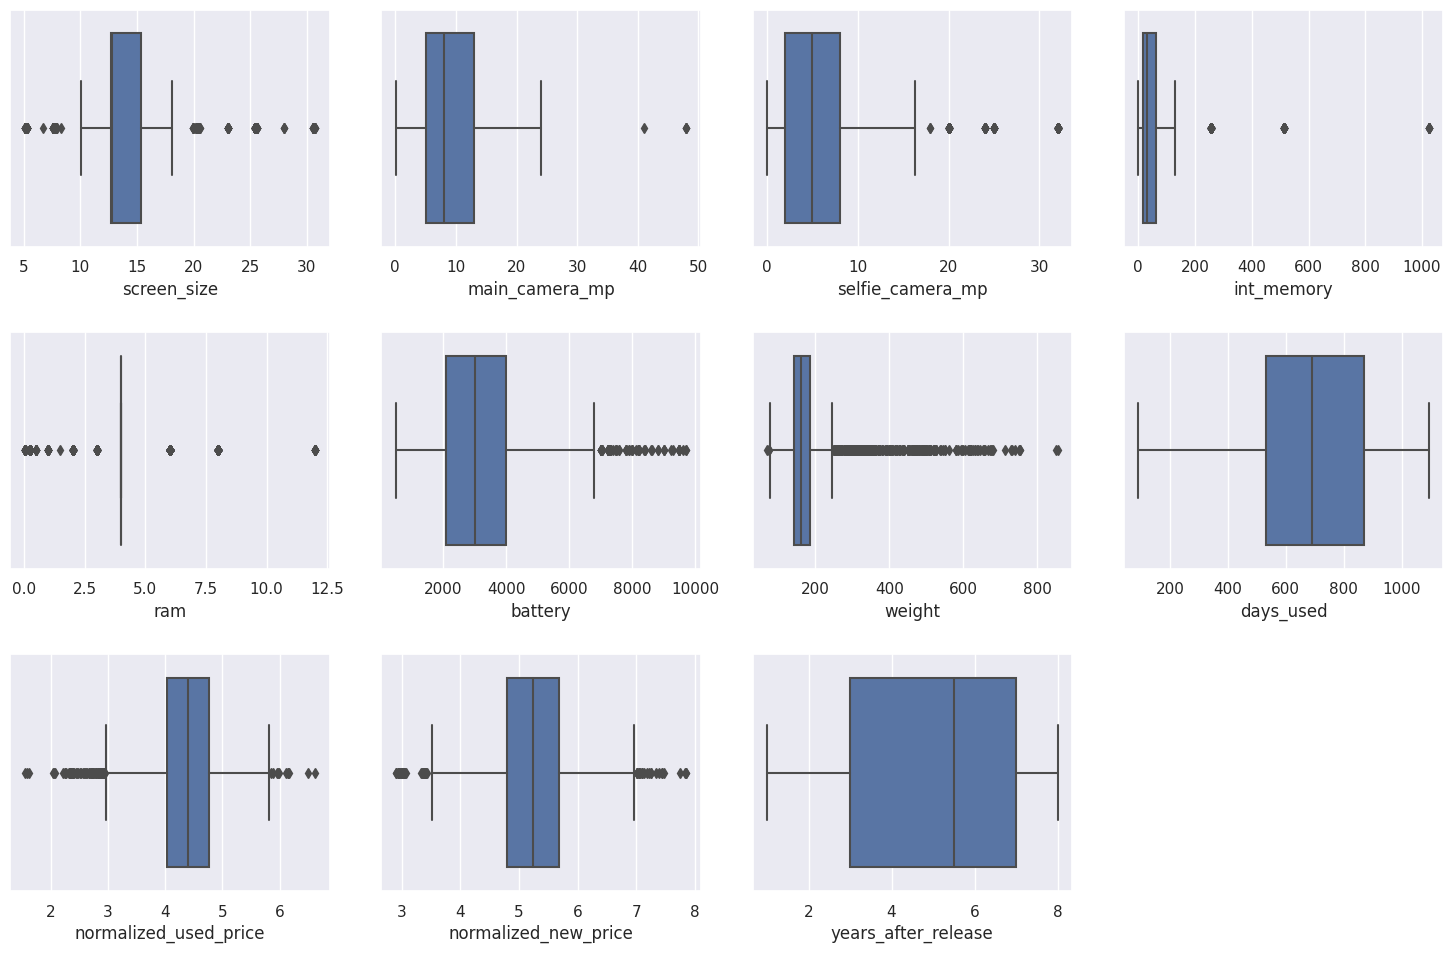

In [ ]:
# Outlier detection using boxplot
num_cols = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

###Data Preperation for Modeling

In [ ]:
# Defining the x and y variables

#Independent Variables
X = df.drop(['normalized_used_price'], axis=1)

#Dependent Variable
y = df['normalized_used_price']

In [ ]:
# Adding Intercept to the data
X = sm.add_constant(X)
X.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_after_release
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


####Creating Dummy Variables

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


####Splitting Data

In [ ]:
# Splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                           17:18:55   Log-Likelihood:                 124.29
No. Observations:                   2417   AIC:                            -150.6
Df Residuals:                       2368   BIC:                             133.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations and Interpretations**

**R-squared**
- The R-squared value (**.845**) tells us that our model can expalin **84.5%** of the variance in the training set.

**Constant Coefficient**
- The constant coefficient (**1.3156**) states that if all of our predictor variables(independent variables) are zero then we would expect the normalized used price to be **1.3156**

**Coefficient of Predictor Variable**
- Represent the change in the output (dependent) due to a change in one unit of the predictor variable if everything else is held constant.
  - Here are a few examples:
    - For every one additional centimeter in screen size there is an approximate increase of normalized used price by approximately 0.0244.
    - For every one additional megapixel in the main camera there is an approximate increase of normalized used price by approximately 0.0208.
    - For every one additional megapixel in selfie camera there is an approximate increase of normalized used price by approximately 0.0.0135.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229842,0.180293,0.844943,0.841733,4.326185


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238428,0.184796,0.842386,0.834561,4.502729


**Observations**

- The training $R^2$ is 0.845, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.185 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

###Testing for Multicollinearity

**Variance Inflation Factor (VIF)**: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

- If VIF is 1, then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all.

**General Rule of thumb:**

- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# Function to check for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.751940
1,screen_size,7.671620
2,main_camera_mp,2.285769
3,selfie_camera_mp,2.811422
4,int_memory,1.364199
5,ram,2.282610
6,battery,4.103476
7,weight,6.402639
8,days_used,2.660403
9,normalized_new_price,3.118923


* There are a few columns with moderate VIF values, indicating presence of multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838446,0.234656
1,weight,0.838125,0.234889


In [ ]:
# Dropping Screen Size and checking VIF
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.652508
1,main_camera_mp,2.282516
2,selfie_camera_mp,2.807952
3,int_memory,1.362089
4,ram,2.282606
5,battery,3.863756
6,weight,3.007255
7,days_used,2.649052
8,normalized_new_price,3.077329
9,years_after_release,4.729041


* We have dealt with multicollinearity in the data
  - All VIF values of non-dummy variables are less than 5
* Now we will rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.8
Date:                   Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                           17:18:56   Log-Likelihood:                 98.433
No. Observations:                   2417   AIC:                            -100.9
Df Residuals:                       2369   BIC:                             177.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped column did not have much effect on the model
- As there is little multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with High P-values
- We will build a model to check the p-values of the variables, and drop the column with the highest p-value
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
- Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
x_train2.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
       'battery', 'weight', 'days_used', 'normalized_new_price',
       'years_after_release', 'brand_name_Alcatel', 'brand_name_Apple',
       'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
       'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_yes'],
  

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_after_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# Creating training and testing sets without the variables with high p-values
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# Running OLS regression without 'screen_size' and the variables with high p-values
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     896.2
Date:                   Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                           17:18:57   Log-Likelihood:                 81.187
No. Observations:                   2417   AIC:                            -132.4
Df Residuals:                       2402   BIC:                            -45.52
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233978,0.182709,0.839312,0.838308,4.394434


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241491,0.186688,0.838311,0.835935,4.557082


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain approx. 83.8% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842
    * This shows the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Checking Linearity and Independence

How to check linearity and independence?

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# Creating a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867244,0.220244
1525,4.448399,4.601933,-0.153533
1128,4.315353,4.287009,0.028344
3003,4.282068,4.235015,0.047053
2907,4.456438,4.490822,-0.034384


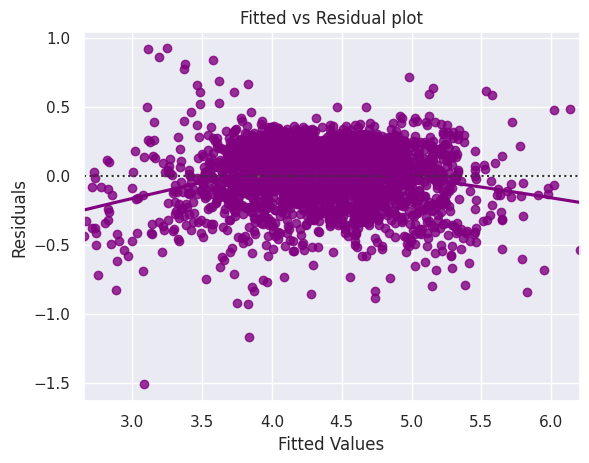

In [ ]:
# Plotting fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

- **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### Testing for Normality

How to check normality?

- The shape of the histogram of residuals can give an initial idea about the normality.
- It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

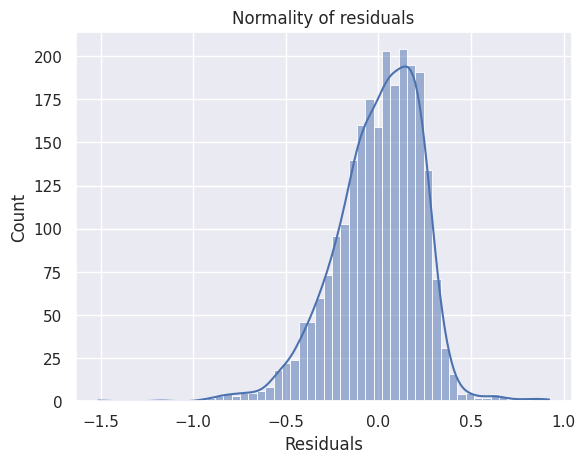

In [ ]:
# Checking shape of histogram or residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The plot of residuals has a bell-shaped curve

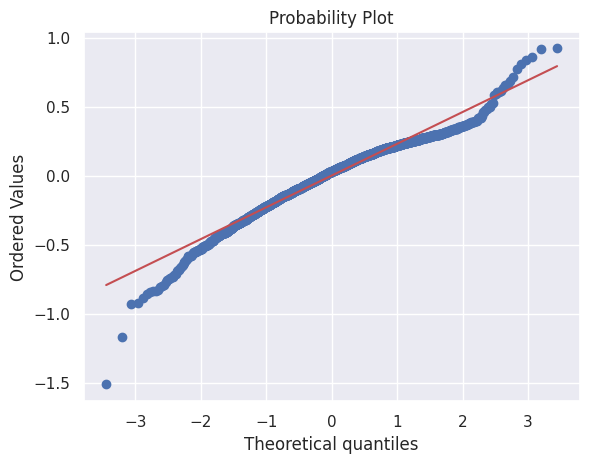

In [ ]:
# Checking the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals almost follow a straight line, but vary at the tails and more so on the left tail

In [ ]:
# Checking the results of the Shipiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9677885174751282, pvalue=7.514483248211277e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

###Test for Homoscedasticity

**How to check for homoscedasticity?**

- We will use the Goldfeldquandt test.
  - Null hypothesis: Residuals are homoscedastic
  - Alternate hypothesis: Residuals have heteroscedasticity
- If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0099485302782731), ('p-value', 0.43212402099141445)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, we will now check a few predictions with our model on the test set.

In [ ]:
#Predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385580
2341,3.696103,4.003926
1913,3.592093,3.643779
688,4.306495,4.103364
650,4.522115,5.113067
2291,4.259294,4.398366
40,4.997685,5.459725
1884,3.875359,4.053094
2538,4.206631,4.035822
45,5.380450,5.227913


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [ ]:
# Creating final training and test sets
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
# Creating final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     896.2
Date:                   Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                           17:18:59   Log-Likelihood:                 81.187
No. Observations:                   2417   AIC:                            -132.4
Df Residuals:                       2402   BIC:                            -45.52
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking final model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233978,0.182709,0.839312,0.838308,4.394434


In [ ]:
# Checking final model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241491,0.186688,0.838311,0.835935,4.557082


* The model is able to explain approx. 84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.56% of the normalized used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as for inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain approx. 84% of the variation in the data and within 4.56% of the normalized used price on the test data, which is good
    - This indicates that the model is good for prediction as well as for inference purposes


2. If the device's megapixels of the main camera increases by one unit, then its normalized used price will increase by approx. .021 units, all other variables held constant


3. If the device's megapixels of the selfie camera increases by one unit, then its normalized used price will increase by approx. 0.0031 units, all other variables held constant


4. If the device's GB of RAM increases by one unit, then its normalized used price increases by approx. 0.0207 units, all other variables held constant

5. If the normalized new price increases by one unit, then its normalized used price will increase by approx. .4415 units, all other variables held constant. This makes sense, because if a device was expensive new then it most likely will have a pricier used sell price.


6. The normalized used price of a device with operating system (not iOS or Windows) will be approx .11276 units less than those relased with an Android operating system.

7. The normalized used price of a device with brand name Karbonn will be approx. .1156 units more than those with brand name Acer.

8. Screen size appears to grow each year along with the weight of the device, so the company should look at investing in models with larger screens for resell.  This is because if the device's weight increases by one unit, then its normalized used price will increase  by approx. .0017 units, all other variables held constant.

9. Investing in the resell of devices with opperating systems of Android, iOS, and Windows. These seem to have better main cameras which have a positive impact on normalized used sell price, and the other operating systems seem to have a negative affect on the normalized used sell price.  


___